In [866]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

#population_basecase.csv
#OD_Matrix_basecase.csv
#population_from_home.csv
#OD_Matrix_from_home.csv
#population_testing_50.csv
#OD_Matrix_testing_50.csv
#population_staggered_work_hour.csv
#OD_Matrix_staggered_work_hour.csv
#population_school_closure.csv
#OD_Matrix_school_closure.csv
#population_wfh_sc.csv
#OD_Matrix_wfh_sc.csv

melbourne = pd.read_csv('/Users/cptnemo2005/Desktop/SEIR/population_basecase.csv', sep=',',header=None)
pop       = melbourne.values
pop       = np.nan_to_num(pop, copy = True)
pop       = pop.astype(int)

od_matrix = genfromtxt('/Users/cptnemo2005/Desktop/SEIR/OD_Matrix_basecase.csv', delimiter=',')
od_matrix = np.reshape(od_matrix, (12,309,309))
od_matrix = np.nan_to_num(od_matrix, copy = True)
od_matrix = od_matrix.astype(int)

#At this point only have 25% for pop and flow, now we scale them up

pop = pop*4
od_matrix = od_matrix*4

for i in range(1,12):
    pop[i,:] = pop[0,:]

to_this_origin   = np.sum(od_matrix,axis = 1)
from_this_origin = np.sum(od_matrix,axis = 2)

to_this_origin

from_this_origin

np.sum(pop,axis = 1)

pop = pop + to_this_origin - from_this_origin

In [867]:
np.sum(pop,axis = 1)

array([4632672, 4632672, 4632672, 4632672, 4632672, 4632672, 4632672,
       4632672, 4632672, 4632672, 4632672, 4632672])

In [888]:
total_trips =  to_this_origin + from_this_origin

In [930]:
new_total_trips = np.sum(to_this_origin,axis = 0)

In [931]:
import numpy as np
import heapq


index_of_10_most_trip = heapq.nlargest(10, range(len(new_total_trips)), new_total_trips.take)

In [932]:
index_of_10_most_trip

[94, 80, 296, 50, 305, 18, 189, 92, 196, 15]

In [933]:
for i in range(10):
    print(new_total_trips[index_of_10_most_trip[i]])

1159784
307712
271292
266756
261776
174740
173388
173204
152836
149240


ValueError: shape mismatch: objects cannot be broadcast to a single shape

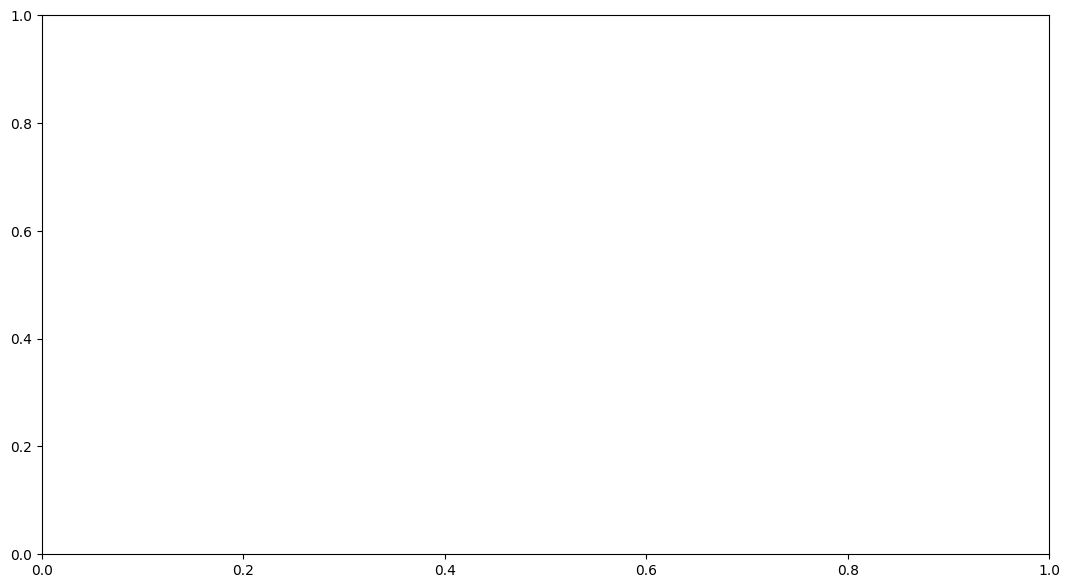

In [937]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Werribee-West',
'Point Nepean'
'Doreen',
'Box Hill'
'Kew East',
'South Melbourne',
'Rowville-North',
'Frankston',
'Craigieburn-South',
'Armadale')
y_pos = np.arange(len(objects))
performance = [1159784,
307712,
271292,
266756,
261776,
174740,
173388,
173204,
152836,
149240]
plt.figure(figsize=(13,7))
plt.barh(y_pos, performance, align='center', alpha=0.5,color='r')
plt.yticks(y_pos, objects)
#plt.xlabel('Usage')
plt.title('Top 10 destination')
plt.savefig('top10zones_destination.jpg')
plt.show()

In [922]:
for i in range(10):
    print(new_total_trips[index_of_10_most_trip[i]])

182900
178296
168784
151692
147760
138988
136624
133724
130812
127800


In [934]:
for i in range(0,len(index_of_10_most_trip)):
    print(melbourne_gdf['SA2_NAME16'][index_of_10_most_trip[i]])

Werribee - West
Point Nepean
Doreen
Box Hill
Kew East
South Melbourne
Rowville - North
Frankston
Craigieburn - South
Armadale


In [921]:
for i in range(0,len(index_of_10_most_trip)):
    print(melbourne_gdf['SA2_NAME16'][index_of_10_most_trip[i]])

Doreen
Werribee - West
Armadale
Donvale - Park Orchards
Montmorency - Briar Hill
Kew
Prahran - Windsor
Cranbourne West
Rowville - North
Heidelberg - Rosanna


In [925]:
for i in range(0,len(index_of_10_most_trip)):
    print(melbourne_gdf['SA2_NAME16'][index_of_10_most_trip[i]])

Balwyn
Richmond (Vic.)
Fitzroy
Balwyn North
Collingwood
Camberwell
Fitzroy North
Glen Iris - East
Ashburton (Vic.)
Abbotsford


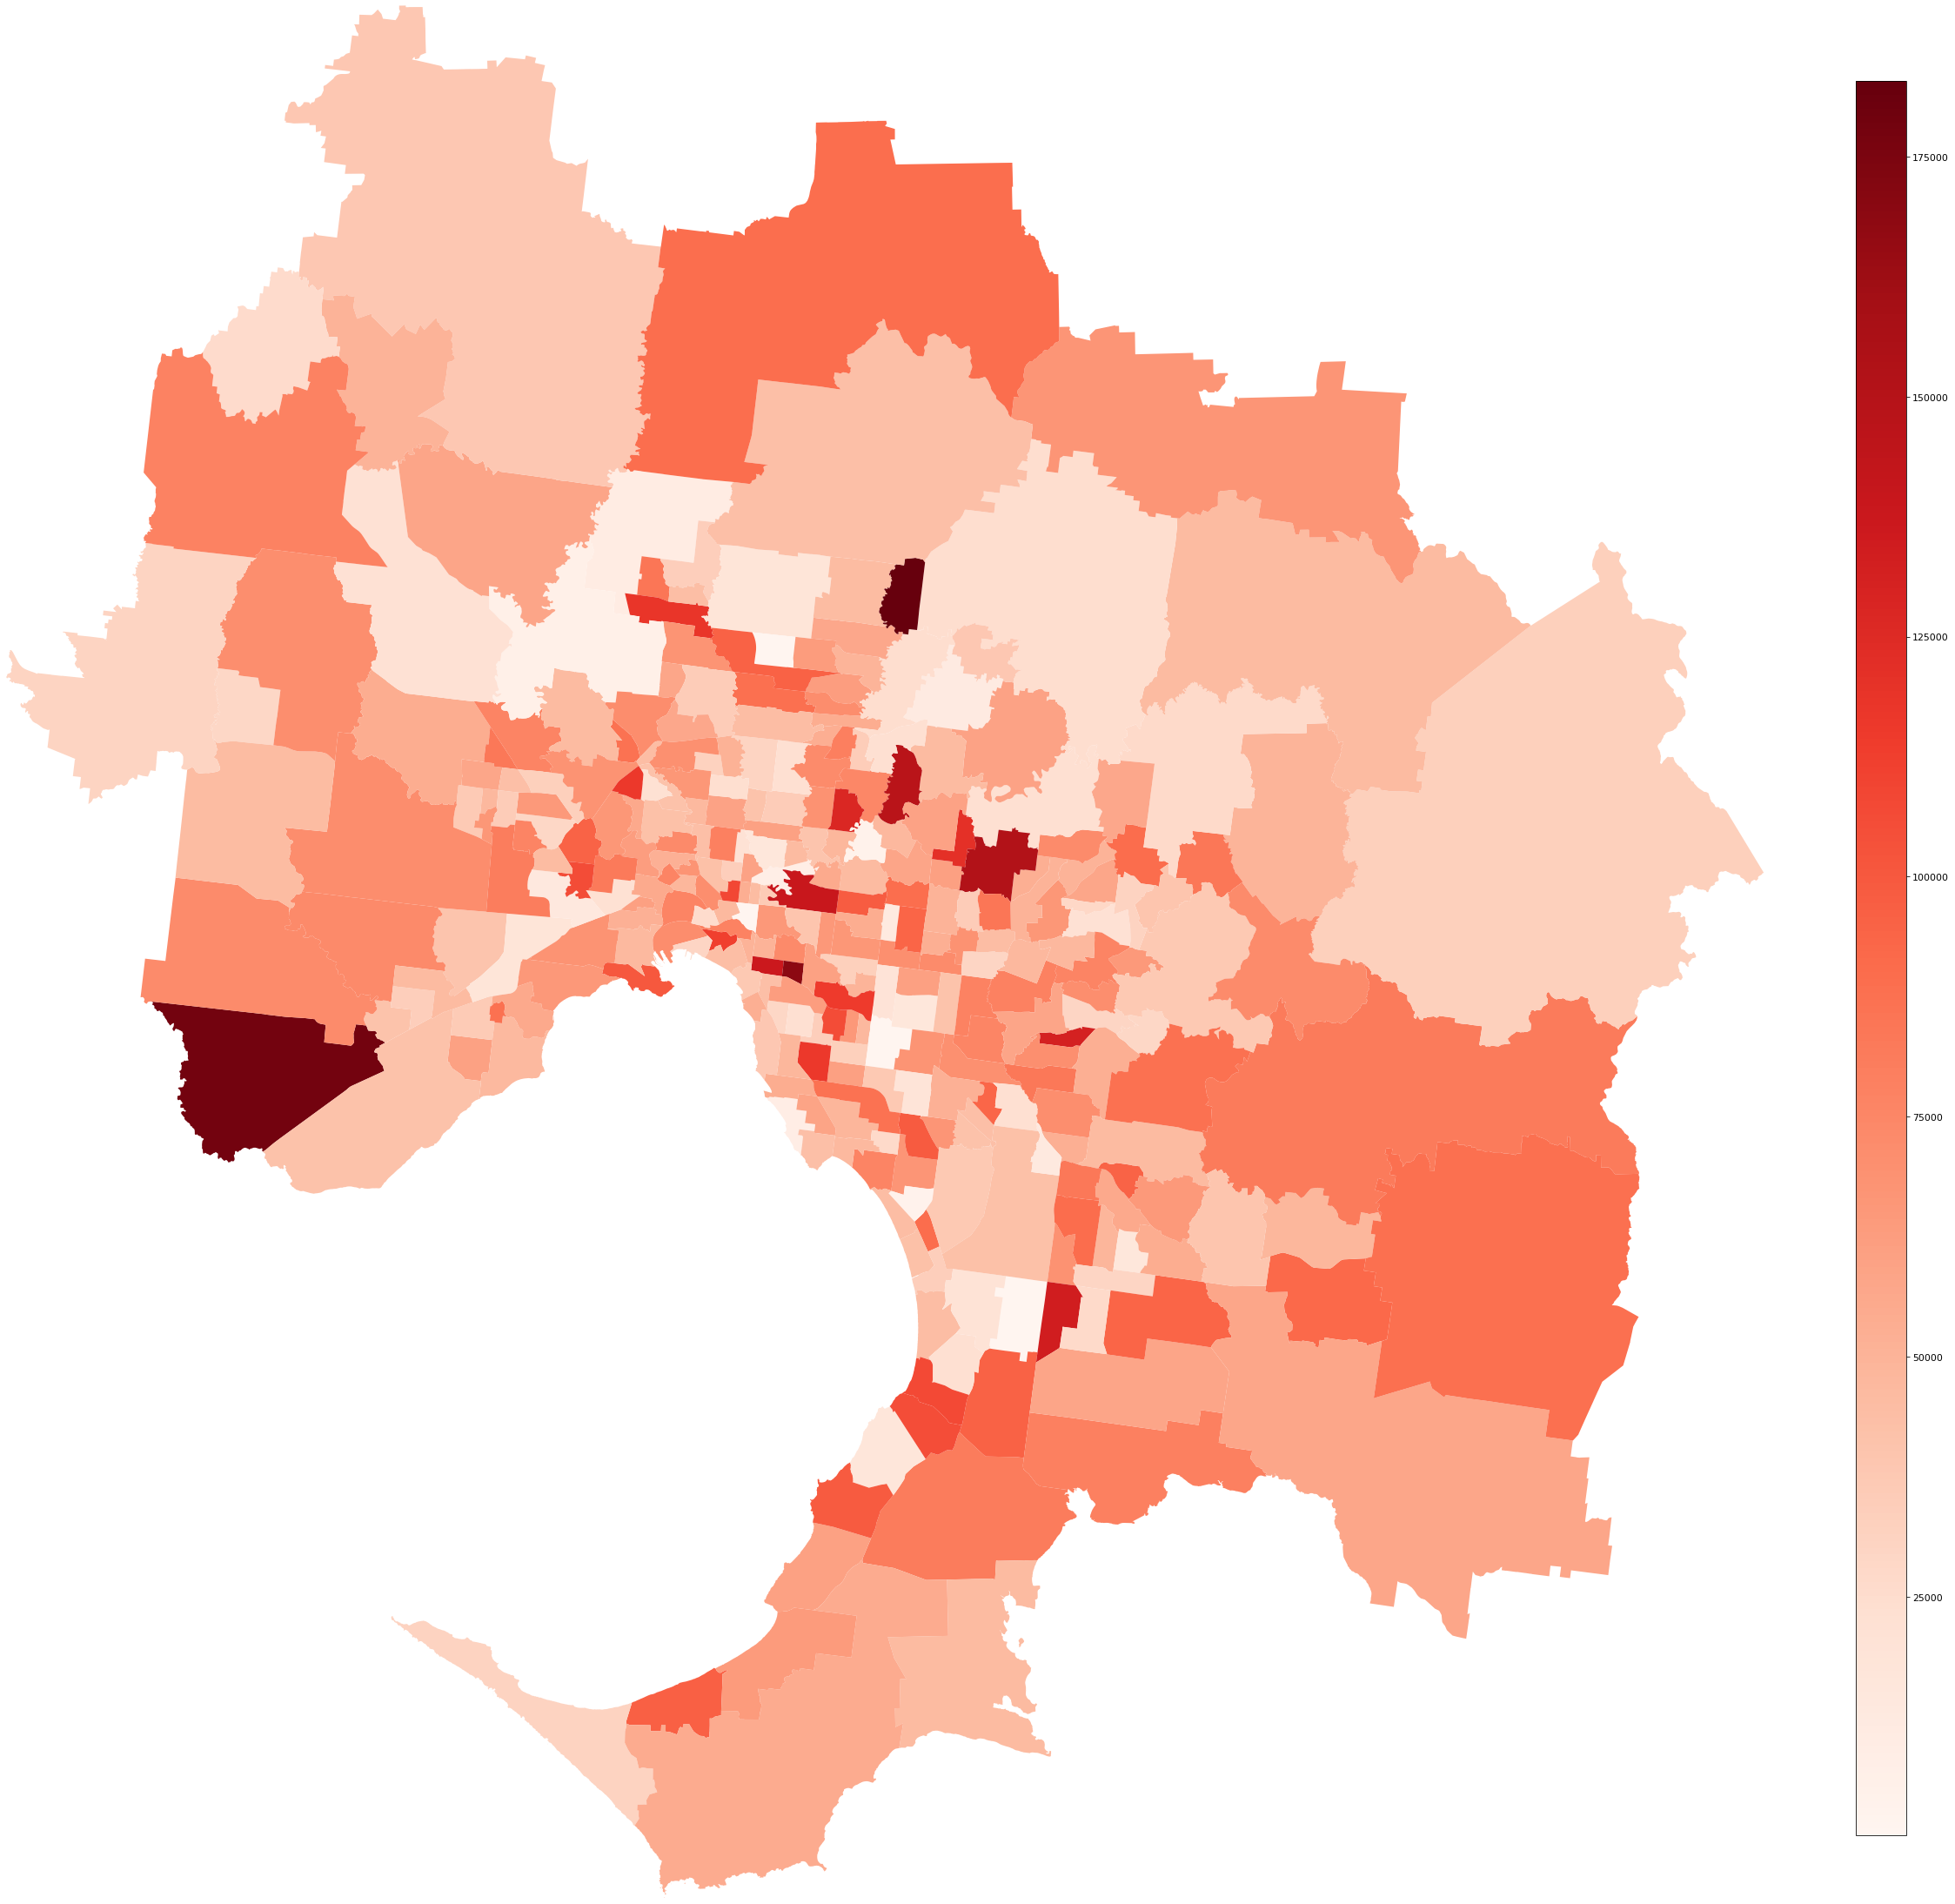

In [900]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap


melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = new_total_trips



plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))



cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white','red'])
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap="Reds")

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap="Reds",\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#plt.savefig('base_sc_wfh_{}.jpg'.format(iterations))
#plt.savefig('base_school_closure_{}.jpg'.format(iterations))
#plt.savefig('base_staggered_wrok_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_50_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_75_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_{}.jpg'.format(iterations))
plt.show()

In [868]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
def sir_plot(res):
    plt.plot(res[::12,0], color='r',label='Susceptible')
    plt.plot(res[::12,1], color='g',label='Infectous')
    plt.plot(res[::12,2], color='b',label='Recovered')
    plt.plot(res[::12,3], color='y',label='Hospital')     
    plt.legend()

from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')
r = od_matrix.shape[0]
n = pop.shape[1]
N = 4632672.0
import random

random.seed(30)


OD_id = [p for p in range (0,309)]
# Take 20 random location
initialInd = random.sample(OD_id, 20)

initial = np.zeros(n)
#Each location has 10 people infected at the beginning
initial[initialInd] = 15

#changing to 14 days of incubation

model = Param(R0 = 2.4, DI = 5.2*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run virus-sim.py

alpha = np.ones(od_matrix.shape)
iterations = 3000
inf = 10
res['baseline'] = sir(model,pop,od_matrix,alpha,iterations,inf)


/Users/cptnemo2005/Desktop/SEIR/virus-sim.py:56: RuntimeWarning: invalid value encountered in true_divide
  realflow = realflow / realflow.sum(axis=2)[:,:, np.newaxis]


In [665]:
newI = res['baseline'][2]

newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

8398.228504816761


In [869]:
newI_base = res['baseline'][2]

newI_base.astype(int)

newI_base = np.sum(newI_base,axis=0)

In [865]:
newI_sc_wfh = res['baseline'][2]

newI_sc_wfh.astype(int)

newI_sc_wfh = np.sum(newI_sc_wfh,axis=0)

In [870]:
newI = newI_sc_wfh - newI_base  
newI = newI.astype(int)
#newI =  np.where(newI > 0, 0, newI) 
newI

array([ -2292,  -1980,  -4090,  -5720,  -1809,   -961,  -3737,  -1810,
        -4250,  -3594,  -1328,   3762,  -3371,  -2737,  -4546,  -4591,
        -2409,  -3112,  -4040,  -5981,  -1868,  -3628,  -3570,    782,
        -1985,  -3271,  -3656,  -2729,  -4620,   -602,  -5673,  -3270,
        -2457,  -5114,  -2387,  -2870,  -2503,  -5752,  -4360,  -5425,
         -793,  -4825,  -2098,  -5640,  -3151, -10559,  -1288,  -4738,
        -5445,  -7652,  -7291,  -6070,  -5231,  -2729,  -6080,  -3964,
        -6974, -13567,  -3790,  -2739,  -2654, -13077,  -3703,   -591,
        -2155,  -5172,   7771,  -6192,   -228,  -4927,  -4647,  -1392,
        -3121,  -4191,  -3531,  -4671,  -1759,  -8344,  -5029,  -6616,
         -909,  -3807,  -1532, -23324,  -4553,  -4403,  -3801,  -1346,
        -4678,   -456,  -5497,  -2462,  -3495,  -1650,  -4884,  -3935,
        -3259,  -3673,  -8448,  -4422,     34,  -4678,  -3041,    519,
        -2335,  -3053,  -2529,  -4007,  -4739,  -5302,    -86,  -6694,
      

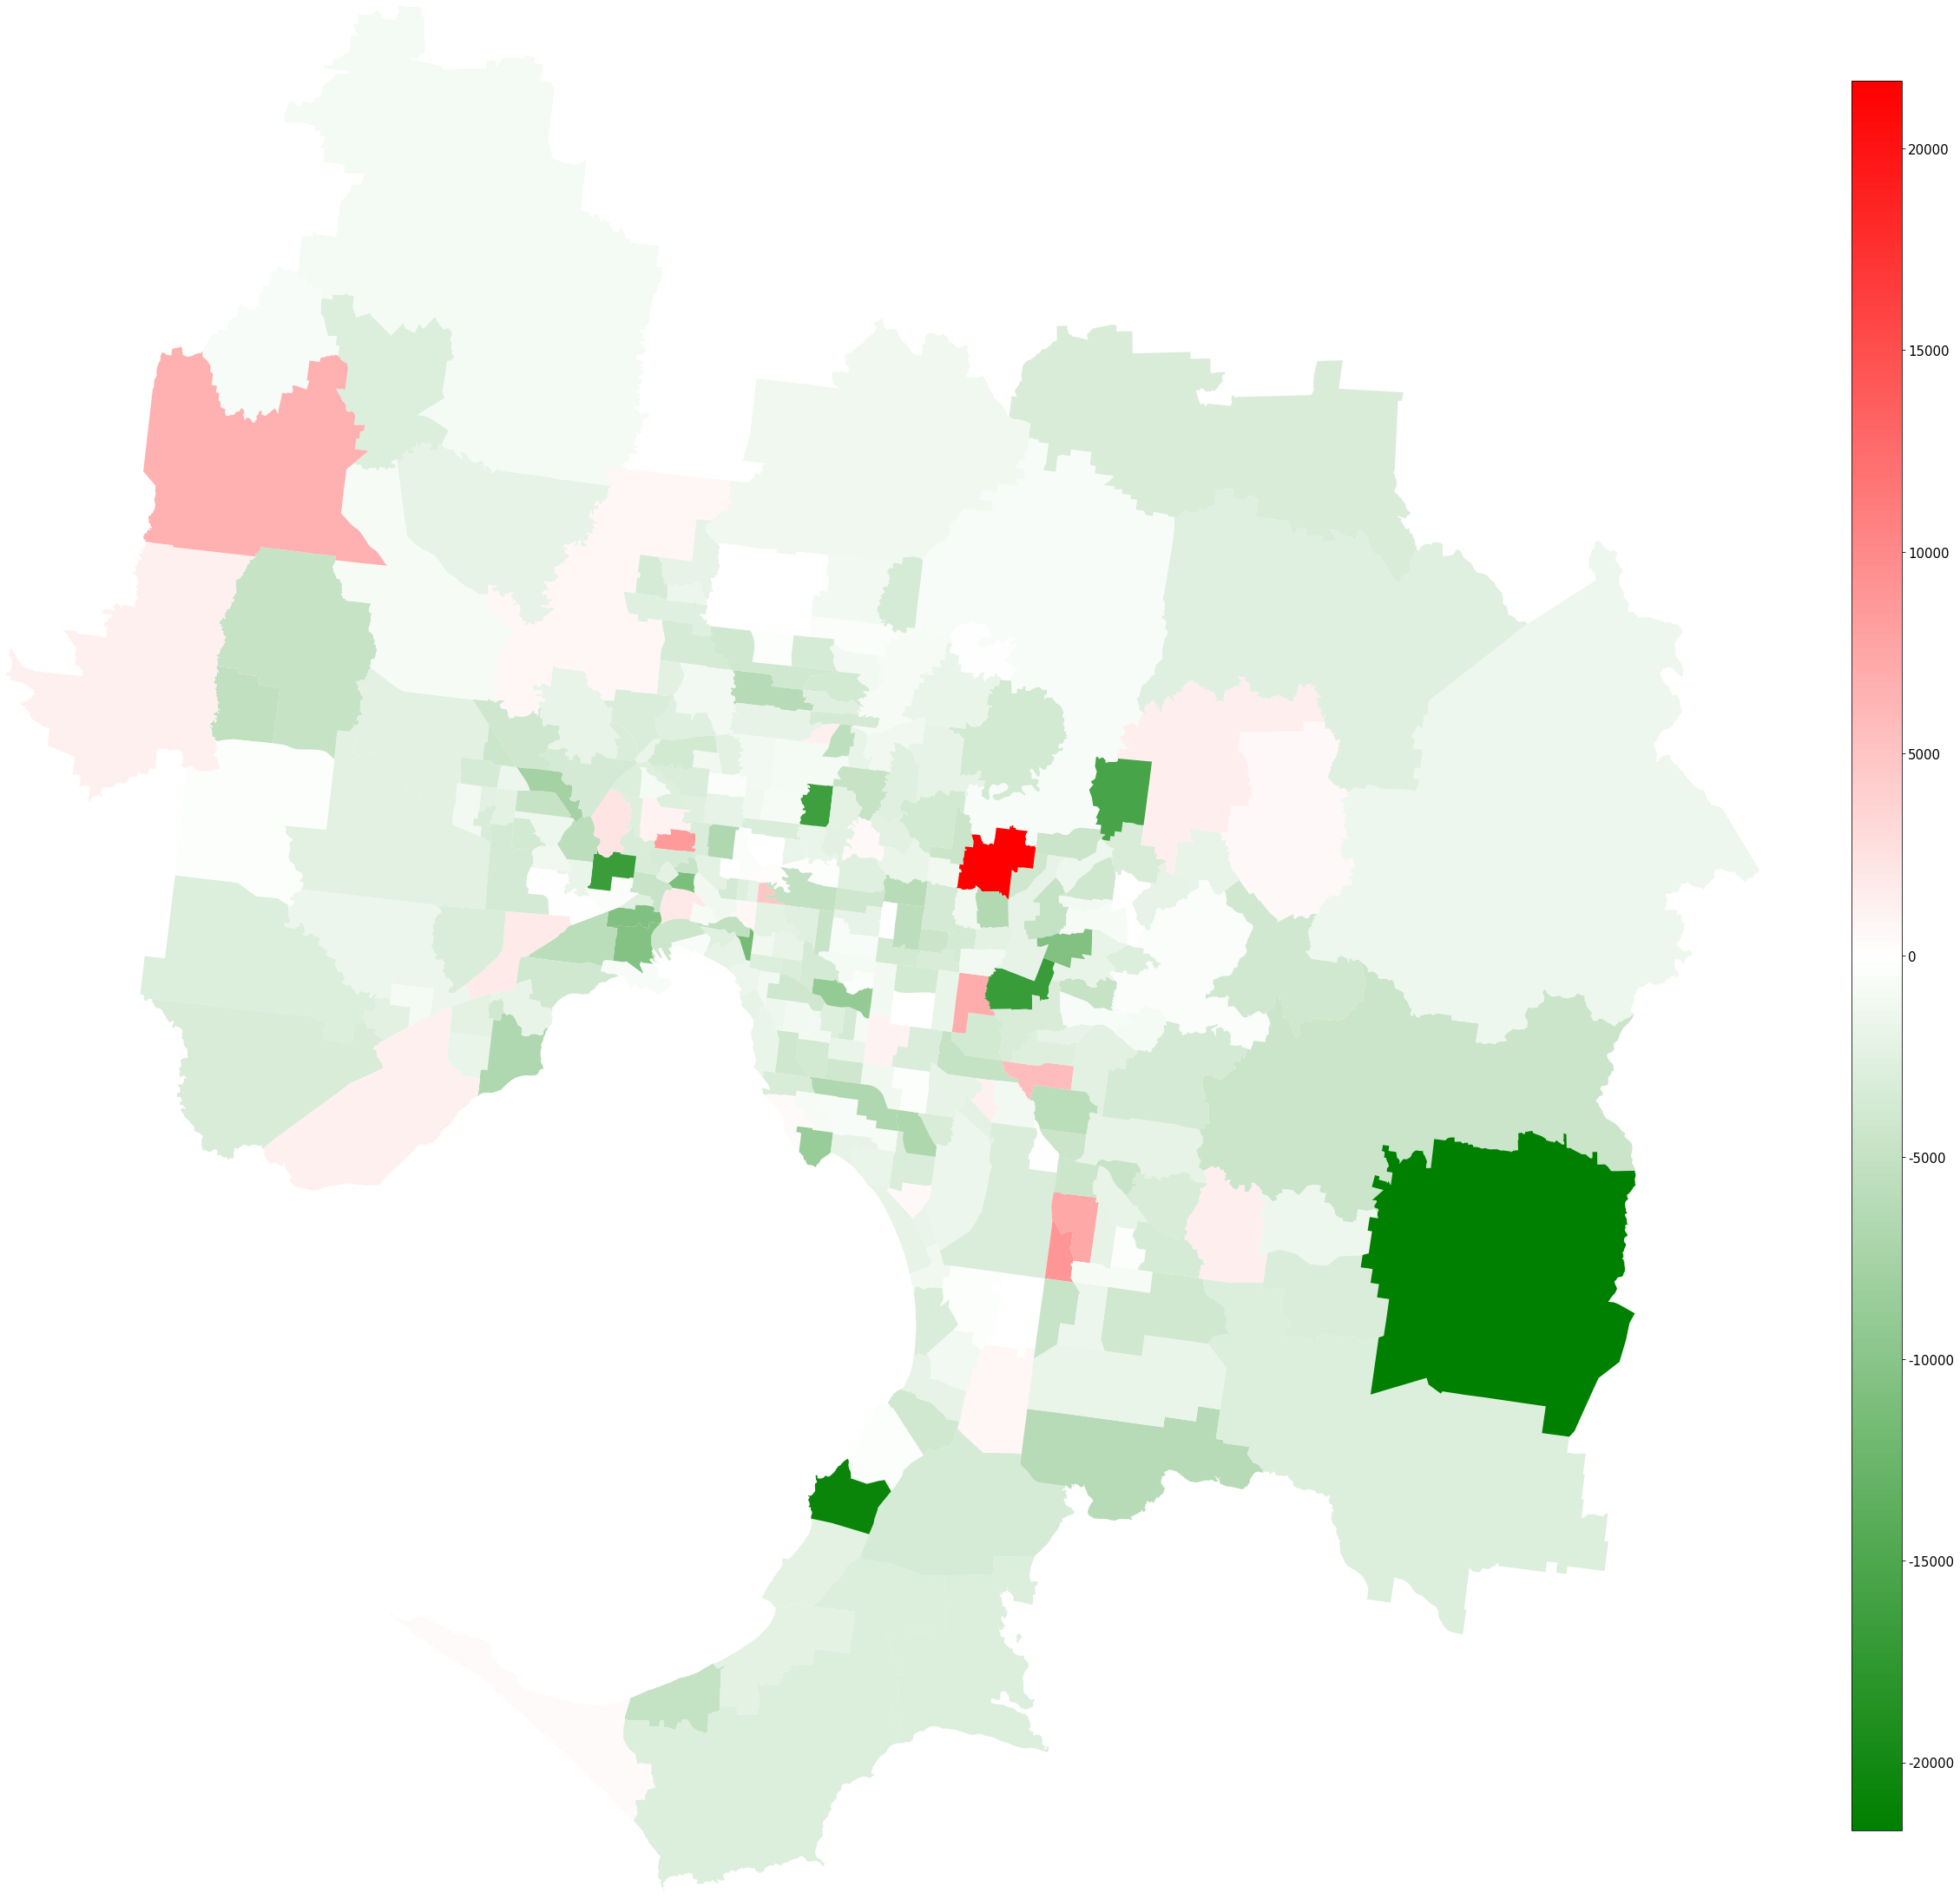

In [873]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap


melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI



plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))



cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white','red'])
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap)

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=-max(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('base_sc_wfh_{}.jpg'.format(iterations))
#plt.savefig('base_school_closure_{}.jpg'.format(iterations))
#plt.savefig('base_staggered_wrok_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_50_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_75_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_{}.jpg'.format(iterations))
plt.show()

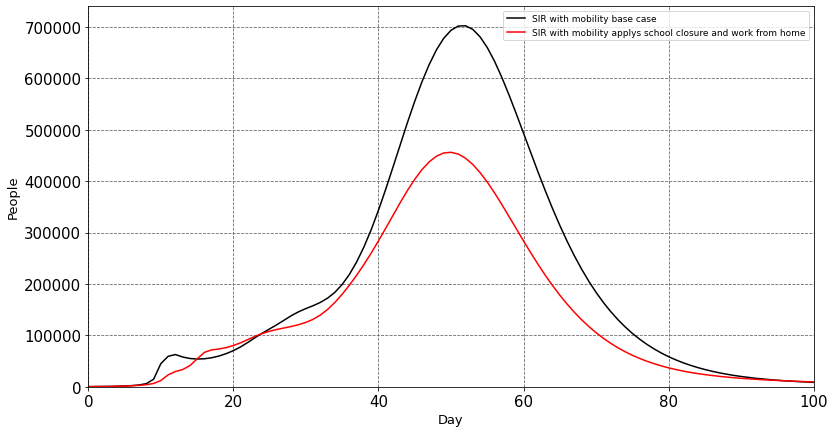

In [820]:
def sir_plot_r(x,y):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 740000,1)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applys school closure and work from home')
    #plt.plot(z, color='r',label='Episim applys school closure', linestyle='--')
    #plt.plot(k, color='k',label='Episim base case', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    #plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('sc_wfh_infection_period.jpg')
    
sir_plot_r(base_case_infected,
        SIR_sc_wfh)

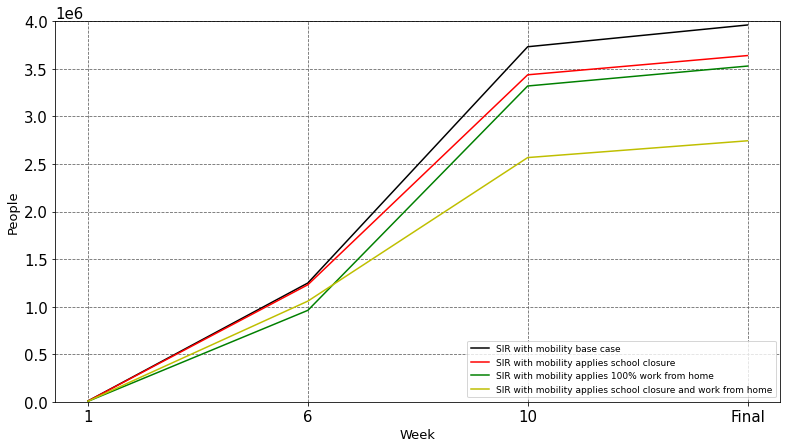

In [815]:
SIR_base_case_acc                 = np.array([8918,1248870,3732247,3961083])
SIR_sc_infected_acc               = np.array([8398,1230509,3437363,3639606])
percent_work_100_infected         = np.array([5361,961377,3319774,3529192])
SIR_sc_wfh_infected_acc           = np.array([6234,1058444,2567253,2743734])


#episim_sc_acc                     = np.array([2100,2888300,2986800,3017900])
#episim_base_case_acc              = np.array([1700,3294700,3376800,3395700])
def sir_plot_r(x,y,z,k):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4000000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applies school closure')
    plt.plot(z, color='g',label='SIR with mobility applies 100% work from home ')
    plt.plot(k, color='y',label='SIR with mobility applies school closure and work from home')
    plt.grid(b=True, which='major', color='#666666',linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('sc_wfh_infection_period_accumulated.jpg')
    
sir_plot_r(SIR_base_case_acc,
           SIR_sc_infected_acc,
           percent_work_100_infected,
        SIR_sc_wfh_infected_acc)

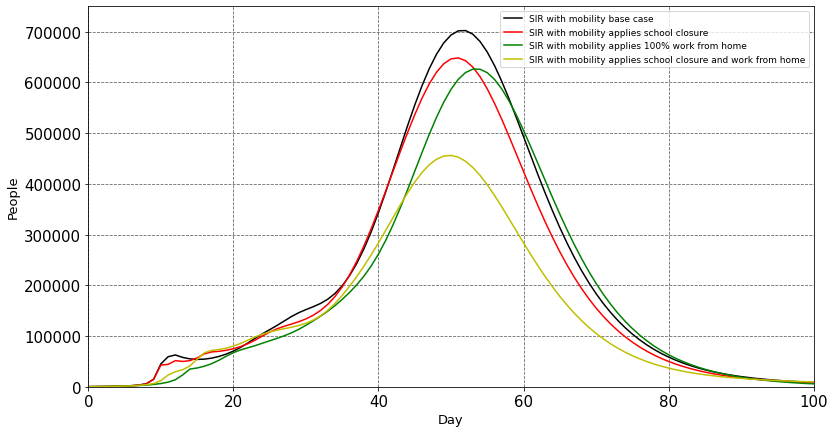

In [824]:
def sir_plot_r(x,y,z,k):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 750000,1)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applies school closure')
    plt.plot(z, color='g',label='SIR with mobility applies 100% work from home ')
    plt.plot(k, color='y',label='SIR with mobility applies school closure and work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
   # plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('sc_wfh_infection_period.jpg')
    
sir_plot_r(base_case_infected,
         #stagg_infected,
           sc_infected,
           work_100_infected,
          SIR_sc_wfh)

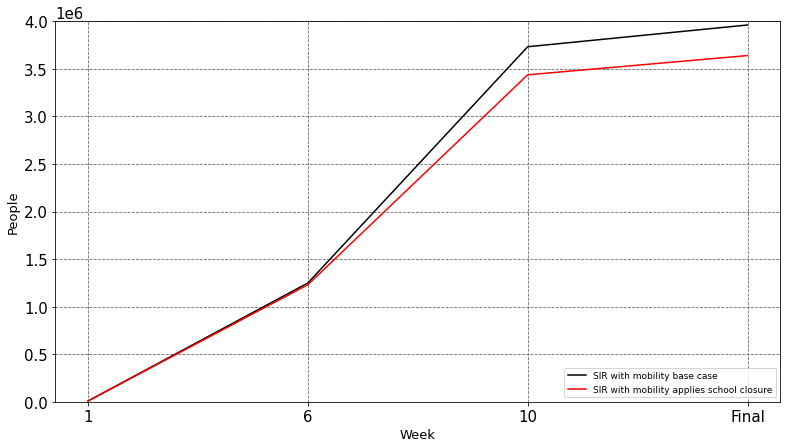

In [825]:
SIR_base_case_acc                 = np.array([8918,1248870,3732247,3961083])
SIR_sc_infected_acc               = np.array([8398,1230509,3437363,3639606])
episim_sc_acc                     = np.array([2100,2888300,2986800,3017900])
episim_base_case_acc              = np.array([1700,3294700,3376800,3395700])
def sir_plot_r(x,y):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4000000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applies school closure')
    #plt.plot(z, color='r',label='Episim applys school closure',linestyle='--')
    #plt.plot(k, color='k',label='Episim base case',linestyle='--')
    plt.grid(b=True, which='major', color='#666666',linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('sc_infection_period_accumulated.jpg')
    
sir_plot_r(SIR_base_case_acc,
        SIR_sc_infected_acc)

In [850]:
sc_infected          = res['baseline'][0][::12,1]

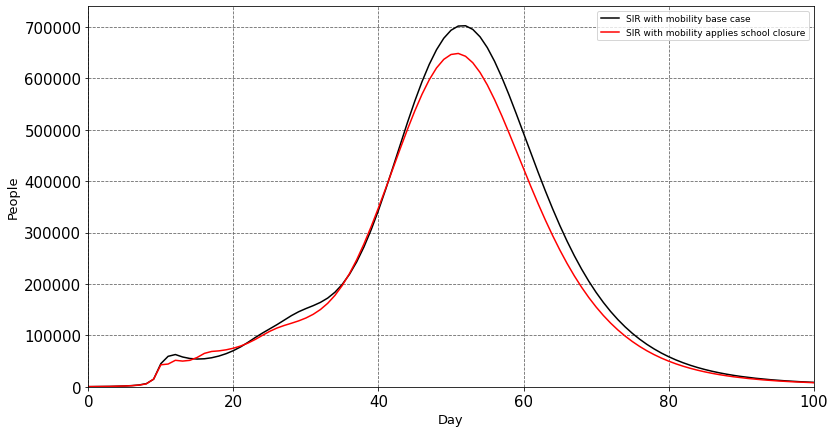

In [826]:
def sir_plot_r(x,y):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 740000,1)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applies school closure')
    #plt.plot(z, color='r',label='Episim applys school closure', linestyle='--')
    #plt.plot(k, color='k',label='Episim base case', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    #plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('sc_infection_period.jpg')
    
sir_plot_r(base_case_infected,
        sc_infected)

In [491]:
stagg_infected          = res['baseline'][0][::12,1]

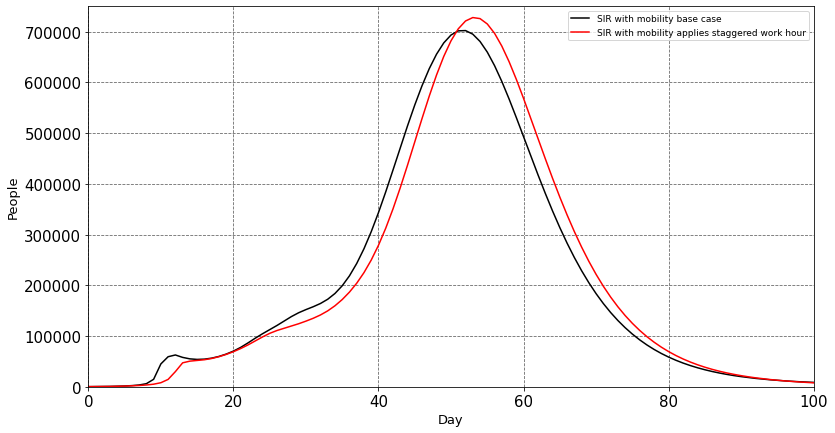

In [827]:
def sir_plot_r(x,y):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 750000,1)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applies staggered work hour')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    #plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('staggered_work_hour_infection_period.jpg')
    
sir_plot_r(base_case_infected,
        stagg_infected)

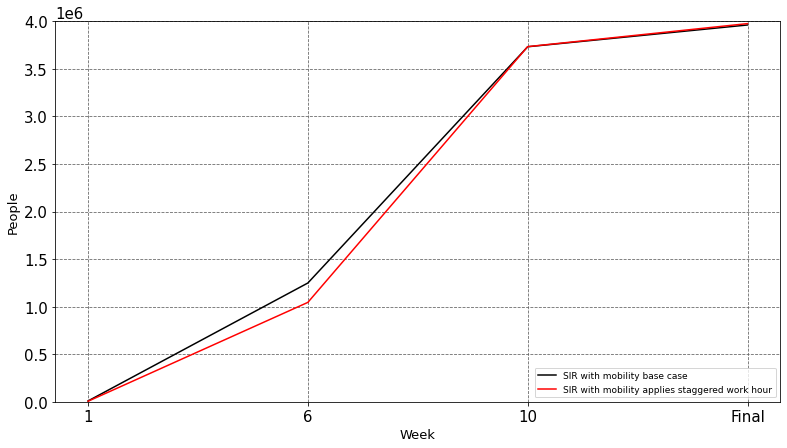

In [828]:
base_case                 = np.array([8918,1248870,3732247,3961083])
staggered_infected        = np.array([5659,1045051,3733440,3975484])



#percent_work_25_infected = np.array([4538,585705,2827201,3022149])
#percent_work_75_infected = np.array([5012,862067,3414935,3642703])

def sir_plot_r(x,y):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4000000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applies staggered work hour')

    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('staggered_work_hour_infection_period_accumulated.jpg')
    
sir_plot_r(base_case,
        staggered_infected)

In [793]:
newI_base_case = res['baseline'][2]

newI_base_case.astype(int)

newI_base_case = np.sum(newI_base_case,axis=0)

In [789]:
newI_sc_wfh = res['baseline'][2]

newI_sc_wfh.astype(int)

newI_sc_wfh = np.sum(newI_sc_wfh,axis=0)

In [798]:
newI = newI_sc_wfh - newI_base_case  
newI = newI.astype(int)
#newI =  np.where(newI > 0, 0, newI) 
newI

array([    0,     0,     0,   -24,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,    -8,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
         -43,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,    -2,     0,   -12,     0,
           0,     0,

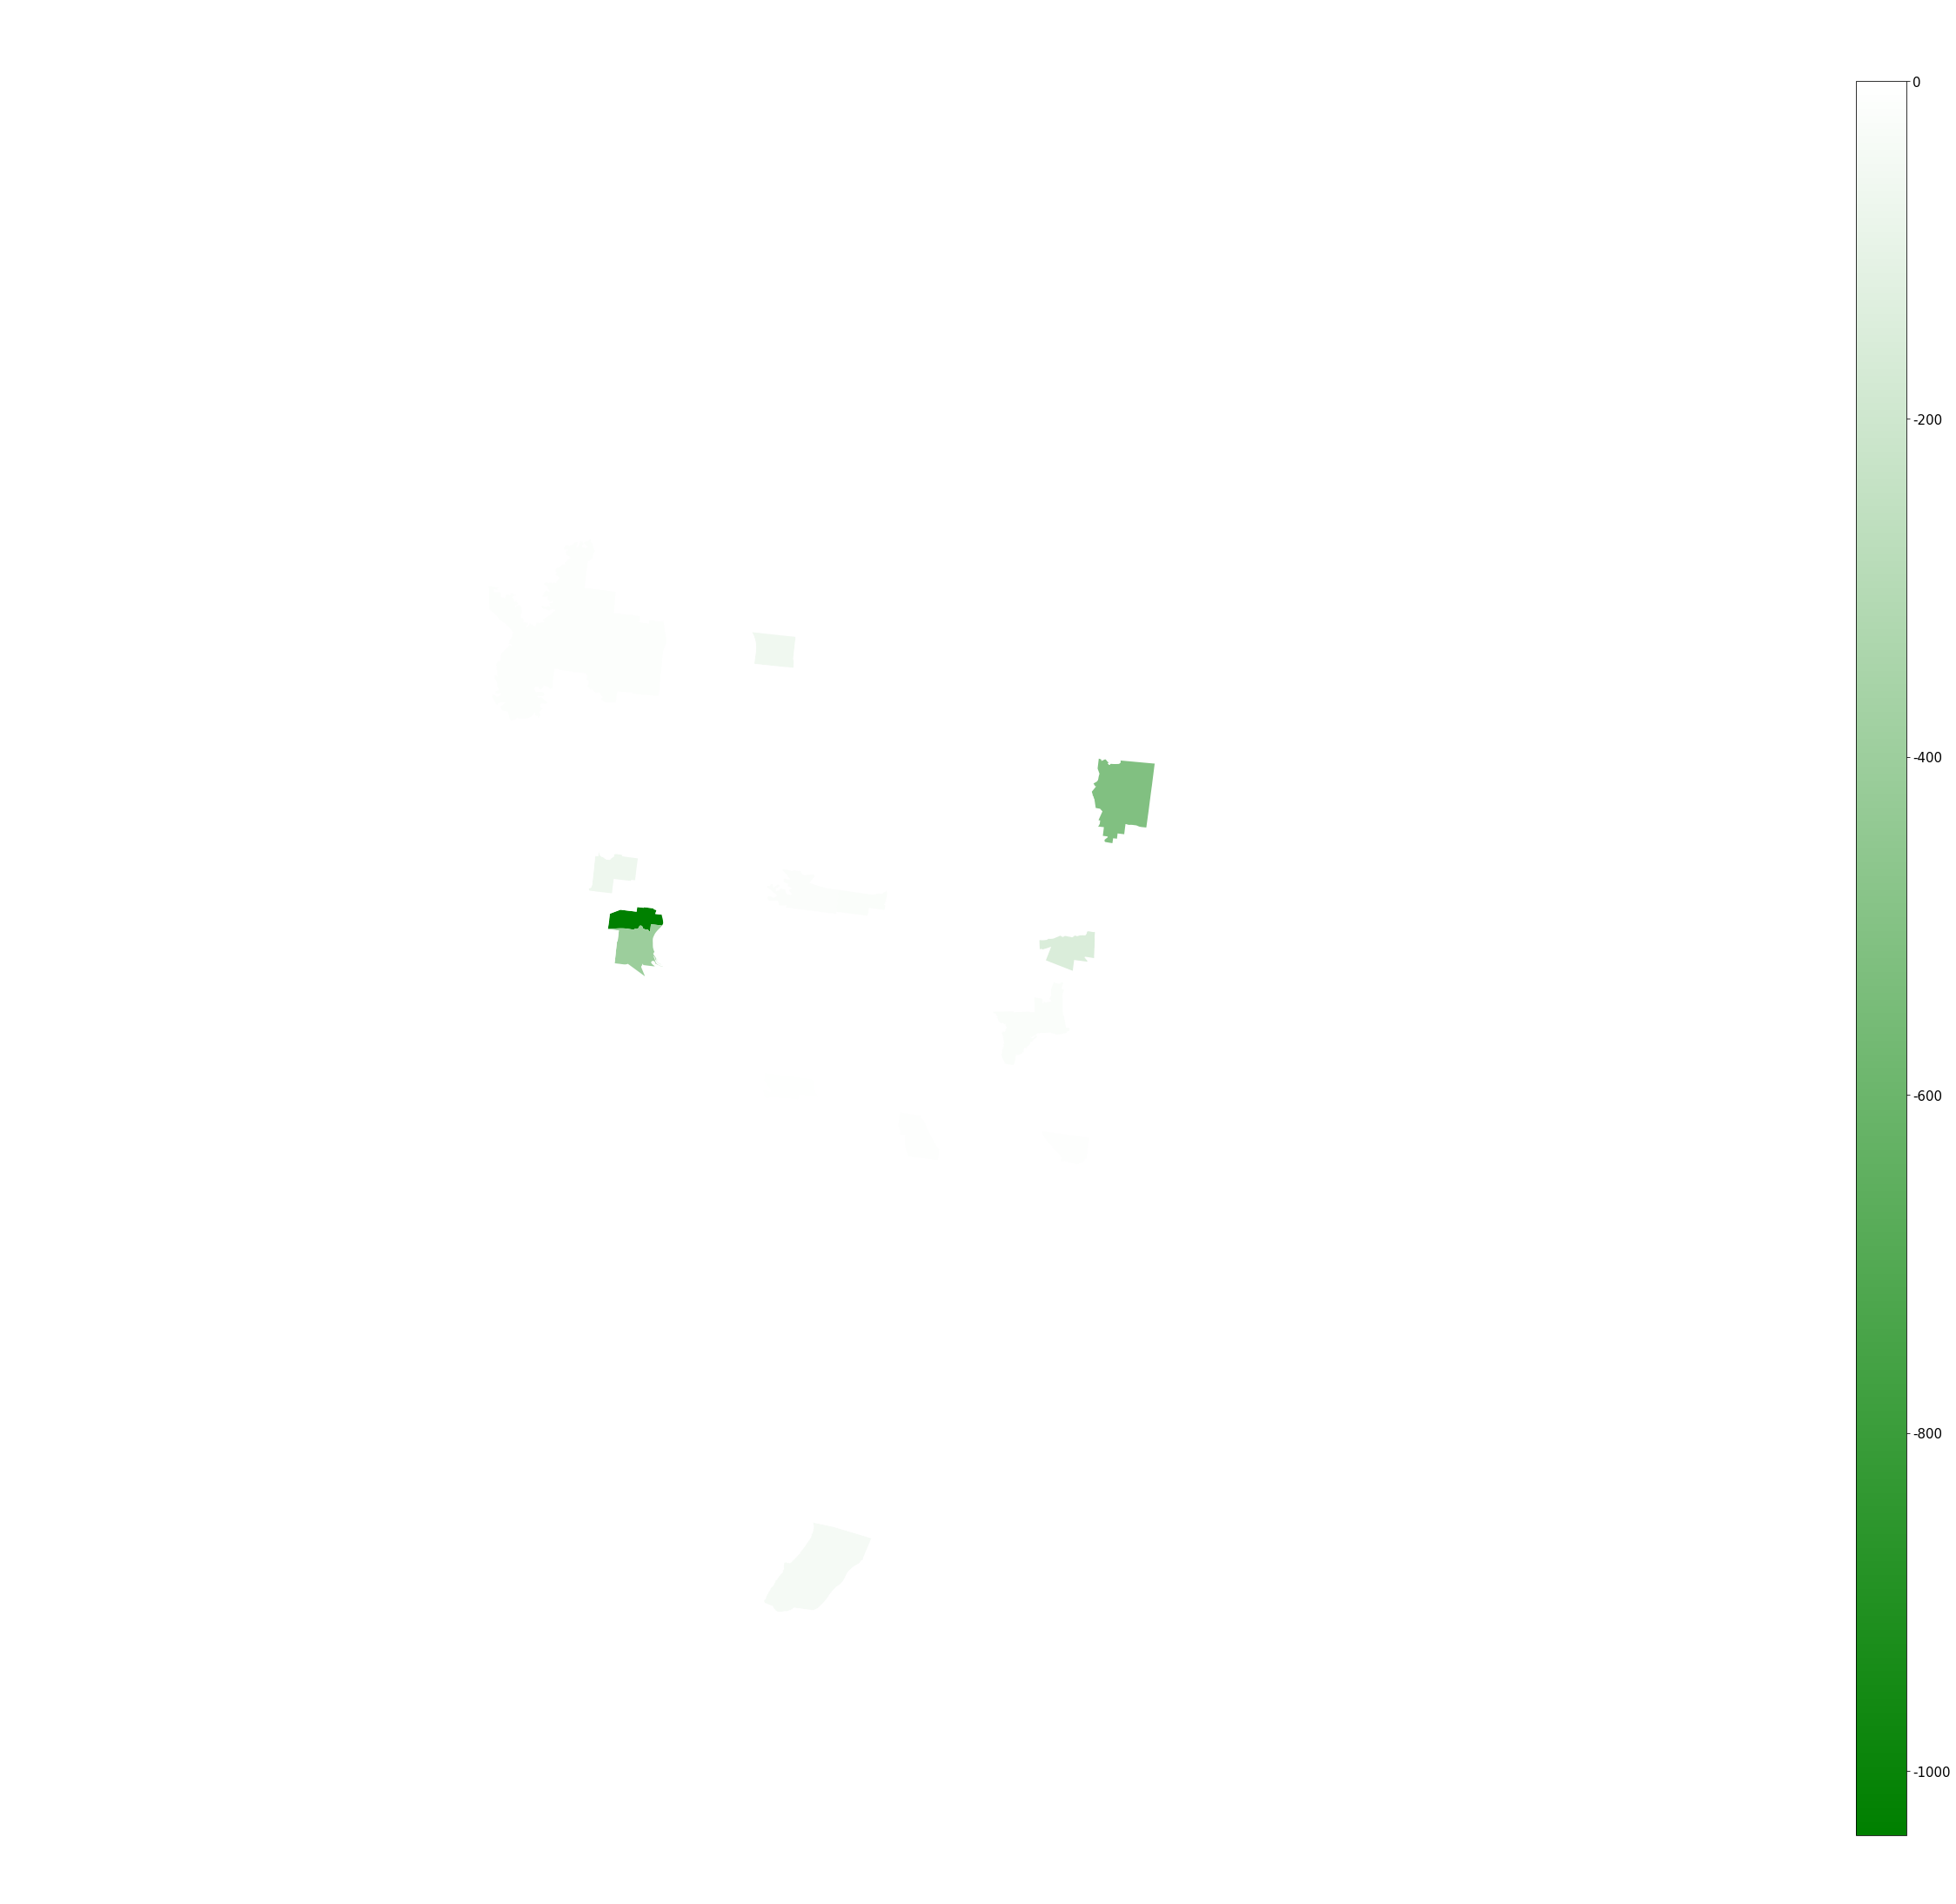

In [804]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap


melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI



plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))



cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white'])
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap)

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('base_sc_wfh_{}.jpg'.format(iterations))
#plt.savefig('base_school_closure_{}.jpg'.format(iterations))
#plt.savefig('base_staggered_wrok_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_50_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_75_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_{}.jpg'.format(iterations))
plt.show()

In [343]:
work_100_infected          = res['baseline'][0][::12,1]

In [339]:
base_case_infected          = res['baseline'][0][::12,1]

In [327]:
work_75_infected          = res['baseline'][0][::12,1]

In [331]:
work_50_infected          = res['baseline'][0][::12,1]

In [335]:
work_25_infected          = res['baseline'][0][::12,1]

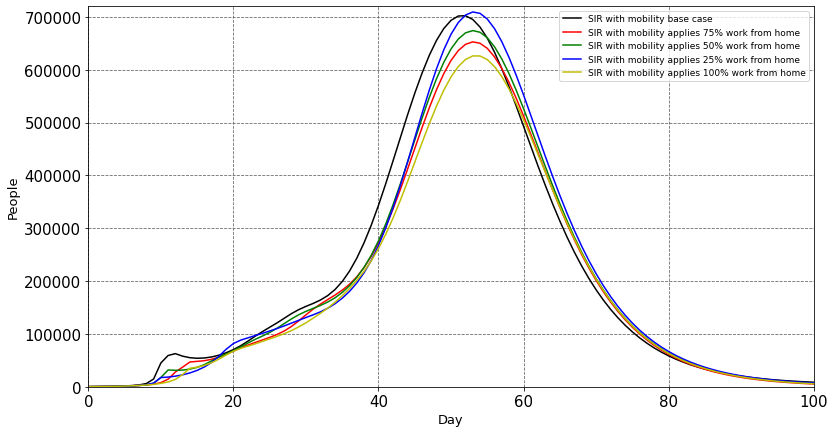

In [831]:
def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 720000,1)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applies 75% work from home')
    plt.plot(z, color='g',label='SIR with mobility applies 50% work from home')
    plt.plot(i, color='b',label='SIR with mobility applies 25% work from home')
    plt.plot(k, color='y',label='SIR with mobility applies 100% work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    #plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('infected_workpercent_staggered_work_hour_infection_period_5_days.jpg')
    
sir_plot_r(base_case_infected,
        work_25_infected,
        work_50_infected,
        work_75_infected,
        work_100_infected)

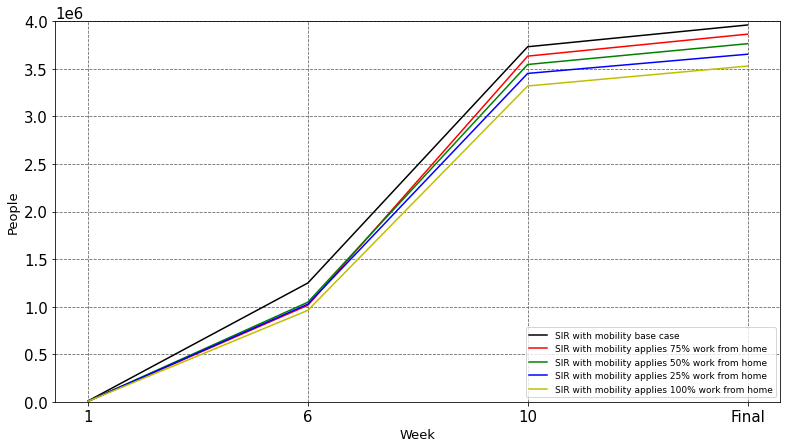

In [836]:
base_case                 = np.array([8918,1248870,3732247,3961083])
percent_work_100_infected  = np.array([5361,961377,3319774,3529192])

percent_work_25_infected = np.array([5460,1026601,3452059,3653701])
percent_work_50_infected  = np.array([5795,1047040,3545956,3764347])
percent_work_75_infected  = np.array([5880,1014490,3633691,3864623])


#percent_work_25_infected = np.array([4538,585705,2827201,3022149])
#percent_work_75_infected = np.array([5012,862067,3414935,3642703])

def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
   # plt.xlim(0, 100,1)
    plt.ylim(0, 4000000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='k',label='SIR with mobility base case')
    plt.plot(y, color='r',label='SIR with mobility applies 75% work from home')
    plt.plot(z, color='g',label='SIR with mobility applies 50% work from home')
    plt.plot(i, color='b',label='SIR with mobility applies 25% work from home')
    plt.plot(k, color='y',label='SIR with mobility applies 100% work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('intected_workpercent_interventions_level_infection_period_5_days.jpg')
    
sir_plot_r(base_case,
         percent_work_75_infected,
           percent_work_50_infected,
        percent_work_25_infected,
          percent_work_100_infected)

In [286]:
newI = res['baseline'][2]

newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))


2743734.715666702


In [ ]:

base_case                 = np.array([8918,1248870,3732247,3961083])
percent_work_100_infected  = np.array([5361,961377,3319774,3529192])
percent_work_25_infected = np.array([5460,1026601,3452059,3653701])
percent_work_50_infected  = np.array([5795,1047040,3545956,3764347])
percent_work_75_infected  = np.array([5880,1014490,3633691,3864623])


#percent_work_100_infected = np.array([5361,961377,3319774,3529192])
#wfh_sc = np.array([6234,1058444,2567253,2743734])


#percent_work_25_infected = np.array([4538,585705,2827201,3022149])
#percent_work_75_infected = np.array([5012,862067,3414935,3642703])

def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4000000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='work')
    plt.plot(y, color='g',label='')

    #plt.plot(k, color='r',label='Base case', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('intected_workpercent_interventions_level_infection_period_5_days.jpg')
    
sir_plot_r(percent_work_100_infected,
          wfh_sc)

In [632]:
SIR_sc_wfh          = res['baseline'][0][::12,1]

In [837]:
import pandas as pd

episim_data = pd.read_excel(open('/Users/cptnemo2005/Desktop/SEIR/Book1.xlsx', 'rb'),sheet_name='Sheet1')

EPSIM_sc_wfh         = episim_data['sc_wfh']
EPSIM_sc       = episim_data['sc']
EPSIM_base = episim_data['Base case']

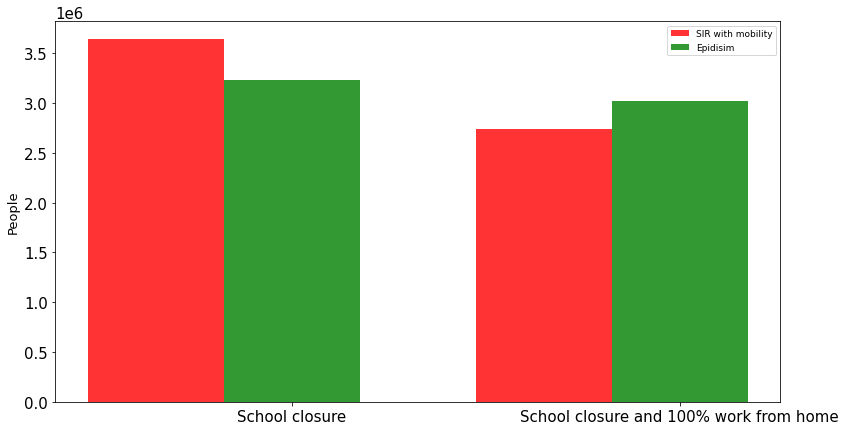

In [860]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
SIR_WITH_MOBILITY = (3639606,2743734)
EPISIM            = (3229900,3017900)

# create plot
plt.figure(figsize=(13,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, SIR_WITH_MOBILITY, bar_width,
                alpha=opacity,
                color='r',
                label= 'SIR with mobility')

rects2 = plt.bar(index + bar_width, EPISIM, bar_width,
                alpha=opacity,
                color='g',
                label='Epidisim')

#plt.xlabel('Policies',fontsize=13)
plt.ylabel('People',fontsize=13)

plt.xticks(index + bar_width, ('School closure','School closure and 100% work from home'))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(loc=1, prop={'size':9})

#plt.legend()
plt.savefig('EPISIM_SIR_SC_WFH_SC_TOTAL.jpg')
#plt.tight_layout()
plt.show()

In [879]:
real_data.size

82

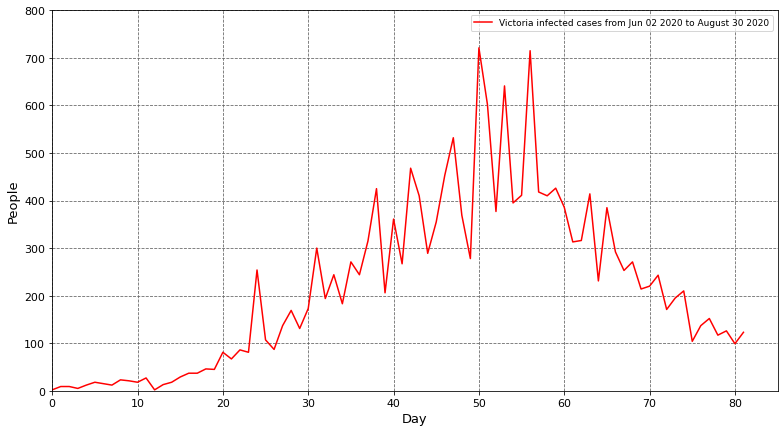

In [887]:
real_data = np.array([
    2,9,9,5,12,18,15,12,23,21,18,27,2,13,18,29,37,37,46,45,81,67,86,81,254,107,87,137,169,131,173,300,194,244,183,271,244,315,
    425,206,361,267,468,410,289,355,453,532,369,278,721,602,377,641,395,411,715,418,410,426,386,313,316,414,231,385,292,253,
    271,214,220,243,171,195,210,104,137,152,117,126,99,123    
])

from datetime import date, timedelta



# this will give you a list containing all of the dates


def sir_plot_r(x):
    plt.figure(figsize=(13,7))
    d1 = date(2020, 6, 9)
    d2 = date(2020, 8, 30)
    dd = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)]
    plt.xlim(0,85,1)
    plt.ylim(0,800,100)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Victoria infected cases from Jun 02 2020 to August 30 2020')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.legend(loc=1, prop={'size':9})
    
    plt.savefig('Victoria_infected_case_Jun_August.jpg')
    
sir_plot_r(real_data) 



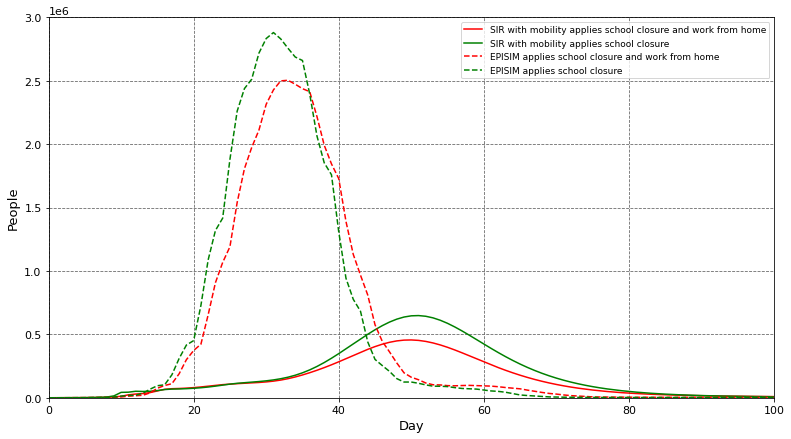

In [857]:
def sir_plot_r(x,y,z,k):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 3000000,100000)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='SIR with mobility applies school closure and work from home')
    plt.plot(y, color='g',label='SIR with mobility applies school closure')
    plt.plot(z, color='r',label='EPISIM applies school closure and work from home', linestyle='--')
    plt.plot(k, color='g',label='EPISIM applies school closure', linestyle='--')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.legend(loc=1, prop={'size':9})
    
    plt.savefig('EPISIM_SIR_SC_WFH_SC.jpg')
    
sir_plot_r(SIR_sc_wfh,
           sc_infected,
          EPSIM_sc_wfh,
          EPSIM_sc) 

In [226]:
newI_schoolclosure = res['baseline'][2]

newI_schoolclosure.astype(int)

newI_schoolclosure = np.sum(newI_schoolclosure,axis=0)

In [261]:
newI_sc_wfh = res['baseline'][2]

newI_sc_wfh.astype(int)

newI_sc_wfh = np.sum(newI_sc_wfh,axis=0)

In [266]:
newI_base_case = res['baseline'][2]

newI_base_case.astype(int)

newI_base_case = np.sum(newI_base_case,axis=0)

In [267]:
newI = newI_sc_wfh - newI_base_case  

#newI =  np.where(newI> 0, 0, newI) 
newI


array([ 1.01913883e-01, -1.25266626e-02,  1.40704980e-03, -1.18305864e+01,
        3.45880607e-02, -3.78728058e-04,  1.63930341e-02, -8.66704739e-03,
        2.86384262e-04, -5.55313448e-03, -1.99537601e-02,  1.02257891e-02,
        1.94754834e-02,  5.77599819e+01, -4.21821220e-03,  2.44217021e+01,
        1.74527177e+02,  2.09347893e-02, -7.25951363e-03,  1.85270981e-03,
        1.19935131e-02, -3.87873614e-04,  1.98228216e-02,  2.44216296e-04,
       -8.71705775e+00,  1.80414363e-03,  2.00257304e-02,  2.07046744e-03,
        6.53572300e-03, -1.15165089e-02,  6.98164608e+00, -4.19099127e-03,
        1.37440287e-03,  5.35753401e-04,  1.64674899e-01, -8.47664260e-04,
        1.72878612e-02,  1.41427950e+02,  8.22814496e-03,  3.17889800e-03,
       -5.37336394e-03, -1.09328639e+01, -7.11202179e-03,  1.30425017e-03,
       -1.09394929e-02, -3.39893453e-01, -2.53930707e-02,  6.12075171e-02,
        1.45904400e-02,  8.65858190e-03,  3.32791339e-02,  1.33776279e-02,
        1.03286103e-03, -

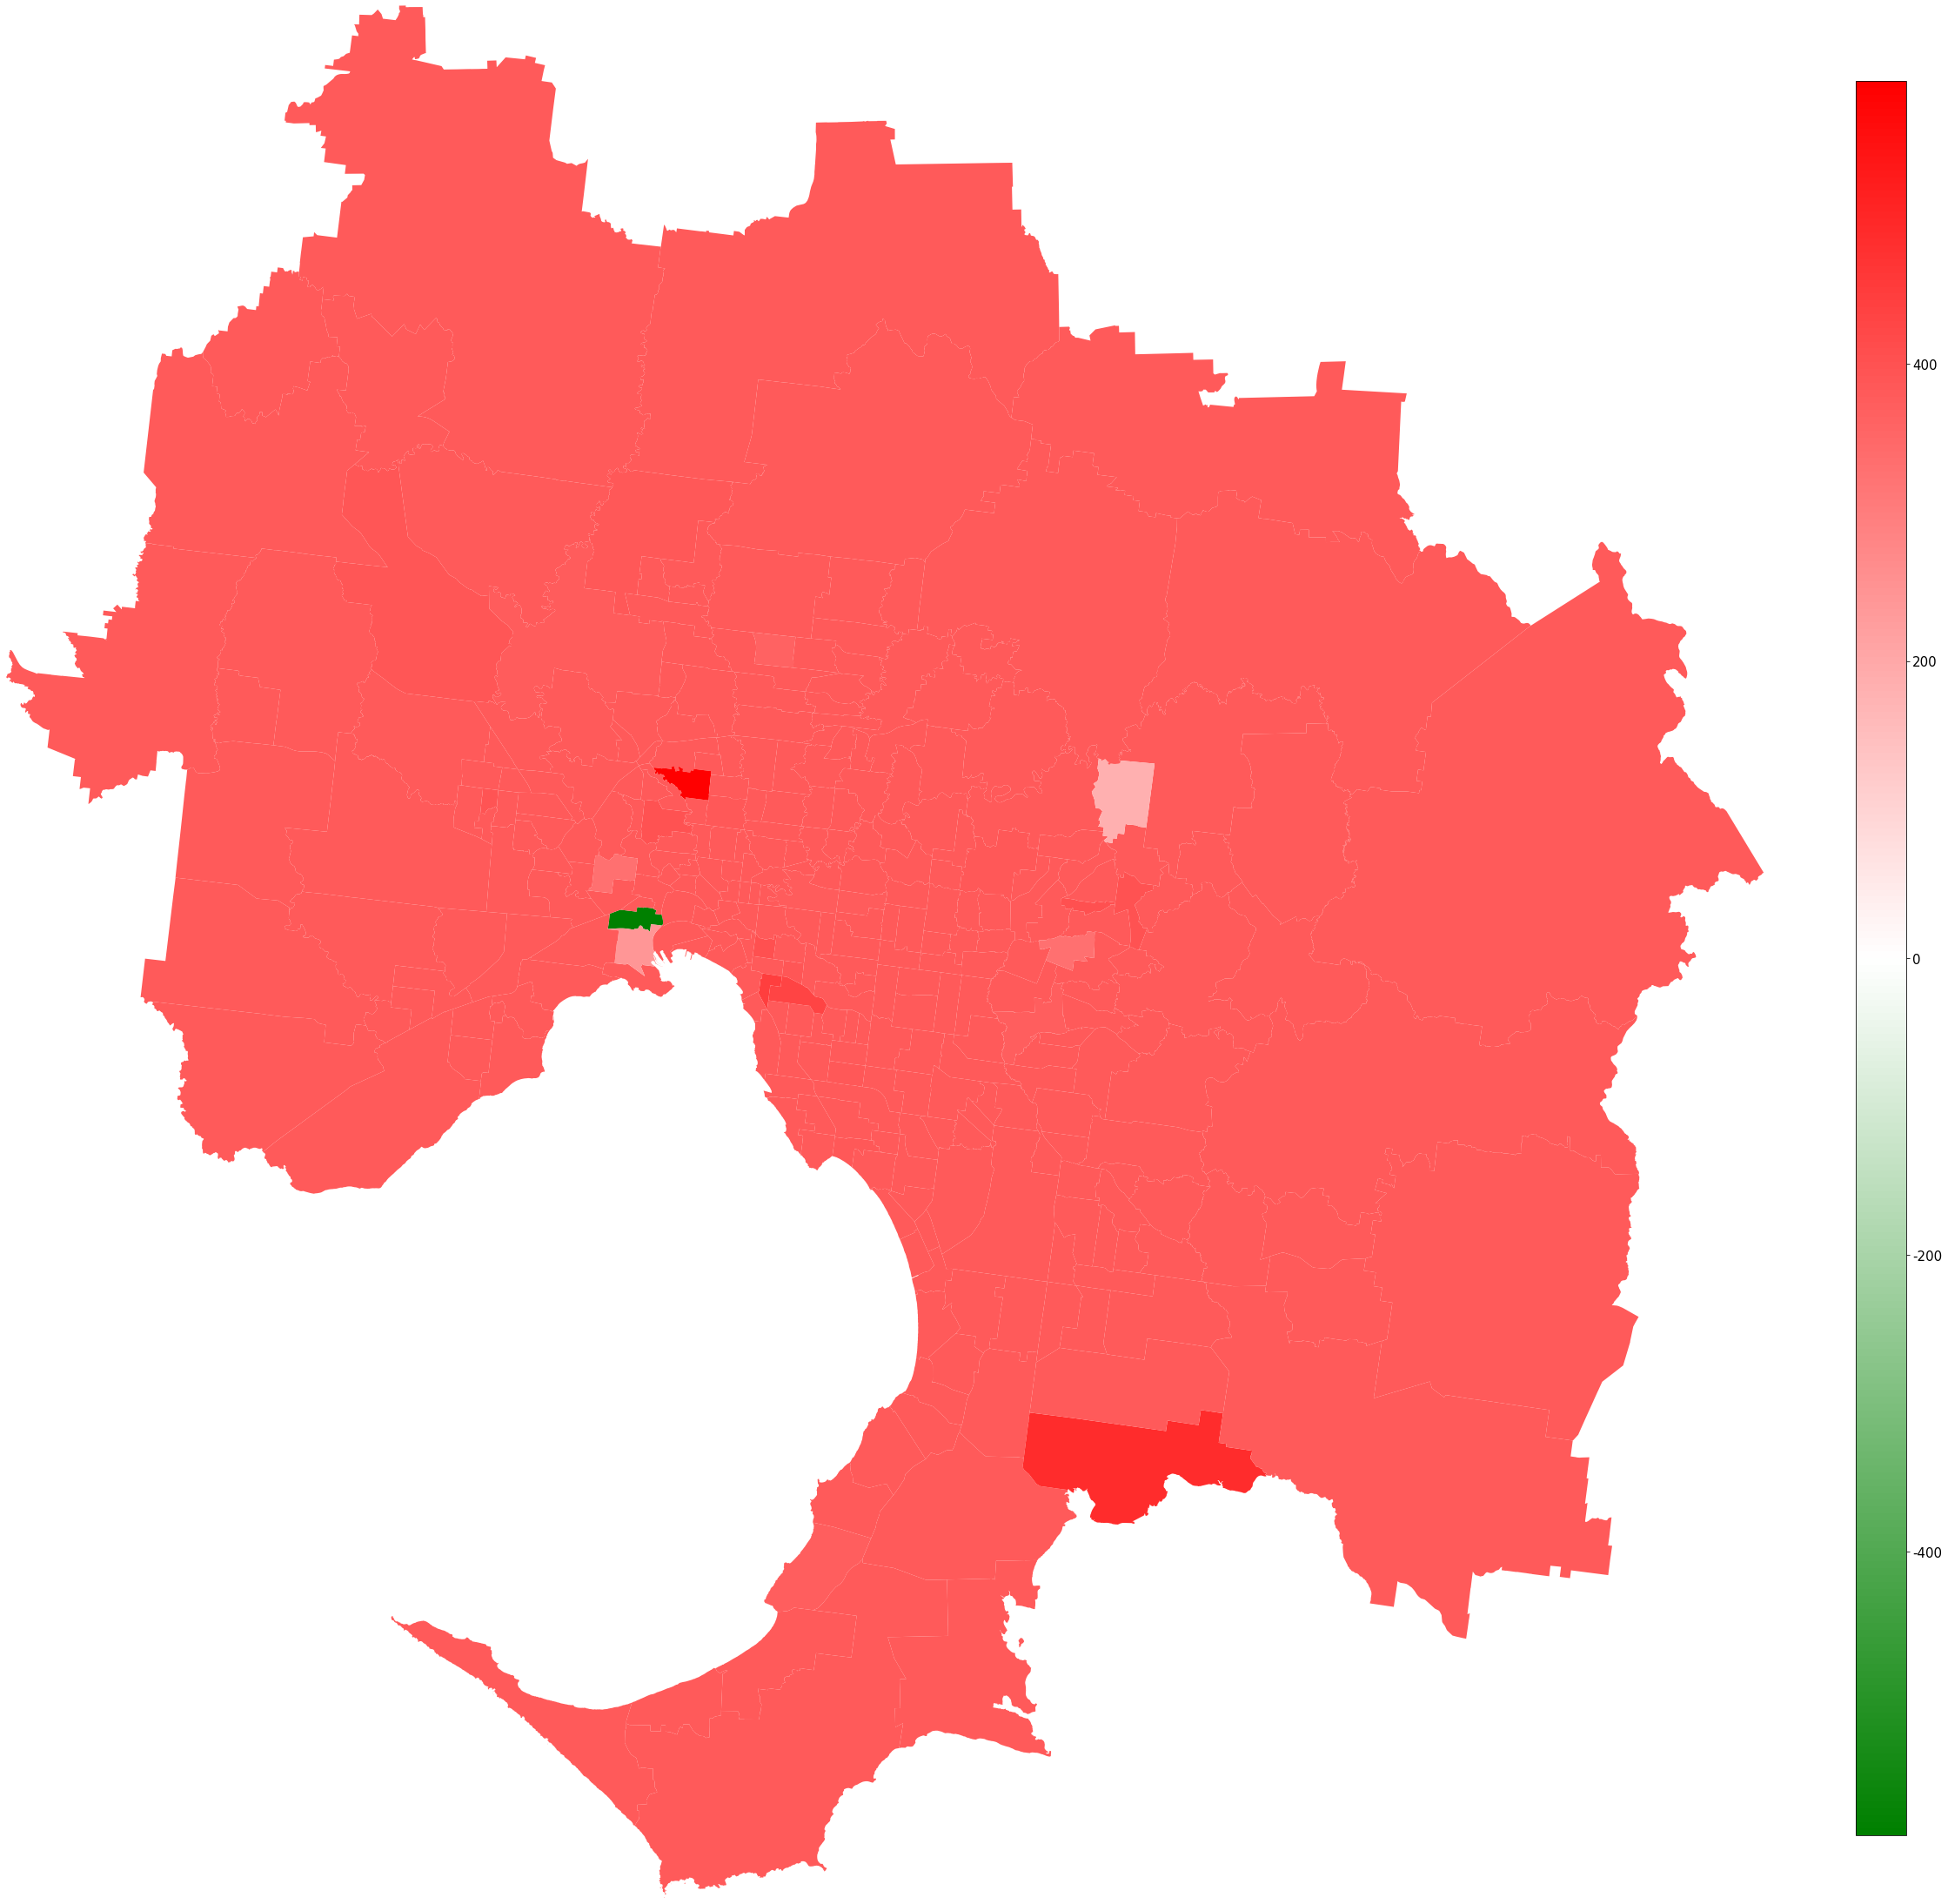

In [268]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap


melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI


plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))



cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white','red'])
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap)

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=-max(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('base_sc_wfh_{}.jpg'.format(iterations))
#plt.savefig('base_school_closure_{}.jpg'.format(iterations))
#plt.savefig('base_staggered_wrok_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_50_{}.jpg'.format(iterations))
#plt.savefig('base_work_from_home_{}.jpg'.format(iterations))
plt.show()

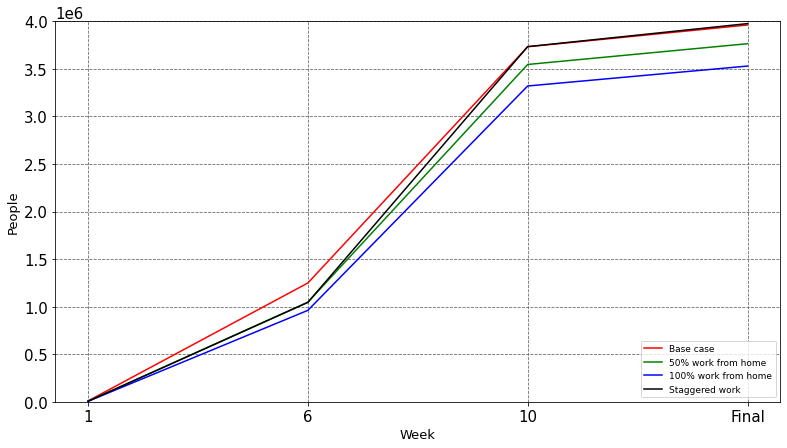

In [101]:
percent_work_100_infected = np.array([5361,961377,3319774,3529192])
percent_work_50_infected  = np.array([5795,1047040,3545956,3764347])
base_case_infected        = np.array([8918,1248870,3732247,3961083])
staggered_work_infected   = np.array([5659,1045051,3733440,3975484])


#percent_work_25_infected = np.array([4538,585705,2827201,3022149])
#percent_work_75_infected = np.array([5012,862067,3414935,3642703])

def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4000000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='50% work from home')
    plt.plot(z, color='b',label='100% work from home')
    plt.plot(i, color='k',label='Staggered work')
    #plt.plot(k, color='r',label='Base case', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('intected_workpercent_interventions_level_infection_period_5_days.jpg')
    
sir_plot_r(base_case_infected,
          percent_work_50_infected,
          percent_work_100_infected,
          staggered_work_infected)

In [48]:
staggered_work     = res['baseline'][0][::12,1]


In [76]:
work_from_home     = res['baseline'][0][::12,1]

In [16]:
percent_work_75    = res['baseline'][0][::12,1]

In [37]:
percent_work_50    = res['baseline'][0][::12,1]

In [8]:
percent_work_25    = res['baseline'][0][::12,1]

In [68]:
base_case          = res['baseline'][0][::12,1]

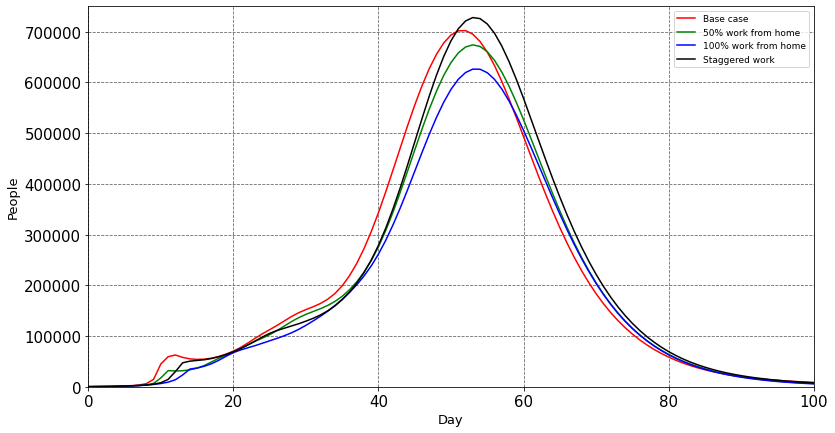

In [62]:
def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 750000,100000)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='50% work from home')
    plt.plot(z, color='b',label='100% work from home')
    plt.plot(i, color='k',label='Staggered work')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.legend(loc=1, prop={'size':9})
    
    plt.savefig('infected_workpercent_staggered_work_hour_infection_period_5_days.jpg')
    
sir_plot_r(base_case,
          percent_work_50,
          work_from_home,
          staggered_work) 

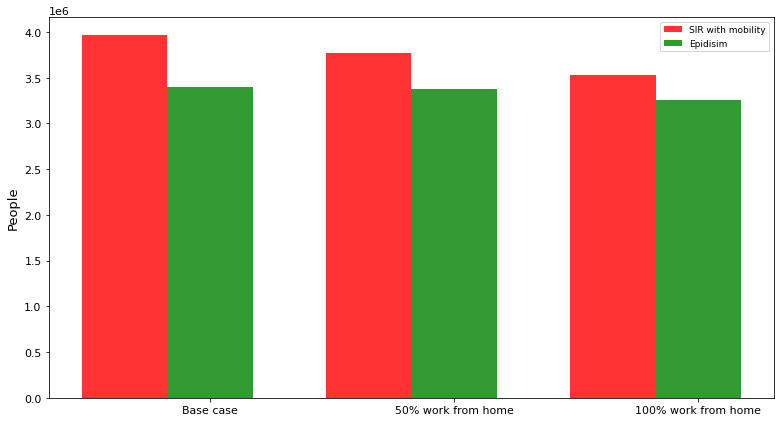

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
SIR_WITH_MOBILITY = (3961083,3764347,3529192)
EPISIM            = (3395700,3379600,3257900)

# create plot
plt.figure(figsize=(13,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, SIR_WITH_MOBILITY, bar_width,
                alpha=opacity,
                color='r',
                label= 'SIR with mobility')

rects2 = plt.bar(index + bar_width, EPISIM, bar_width,
                alpha=opacity,
                color='g',
                label='Epidisim')

#plt.xlabel('Policies',fontsize=13)
plt.ylabel('People',fontsize=13)

plt.xticks(index + bar_width, ('Base case','50% work from home','100% work from home'))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(loc=1, prop={'size':9})

#plt.legend()
plt.savefig('SIR_MOBILITY_EPISIM_TOTAL_INFECTED_POLICIES.jpg')
#plt.tight_layout()
plt.show()

In [255]:
base_case_15_incubation          = res['baseline'][0][::12,1]

In [259]:
percent_work_50_15_incubation    = res['baseline'][0][::12,1]

In [263]:
percent_work_100_15_incubation   = res['baseline'][0][::12,1]

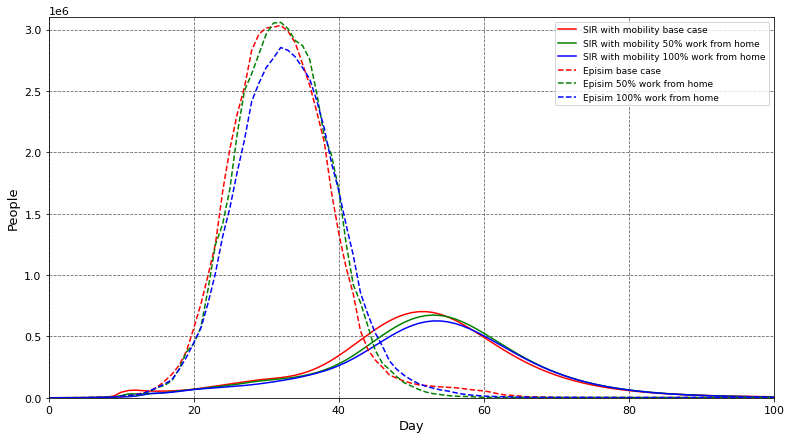

In [78]:
def sir_plot_r(x,y,z,a,b,c):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 3100000,100000)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='SIR with mobility base case')
    plt.plot(y, color='g',label='SIR with mobility 50% work from home')
    plt.plot(z, color='b',label='SIR with mobility 100% work from home')
    plt.plot(a, color='r',label='Episim base case',linestyle='--')
    plt.plot(b, color='g',label='Episim 50% work from home',linestyle='--')
    plt.plot(c, color='b',label='Episim 100% work from home',linestyle='--')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.legend(loc=1, prop={'size':9})
    
    plt.savefig('SIR_MOB_EPISIM_INFECTED.jpg')
    
sir_plot_r(base_case,
          percent_work_50,
          work_from_home,
          episim_base_case_array,
          episim_50_work_from_home_array,
          episim_work_from_home_array) 

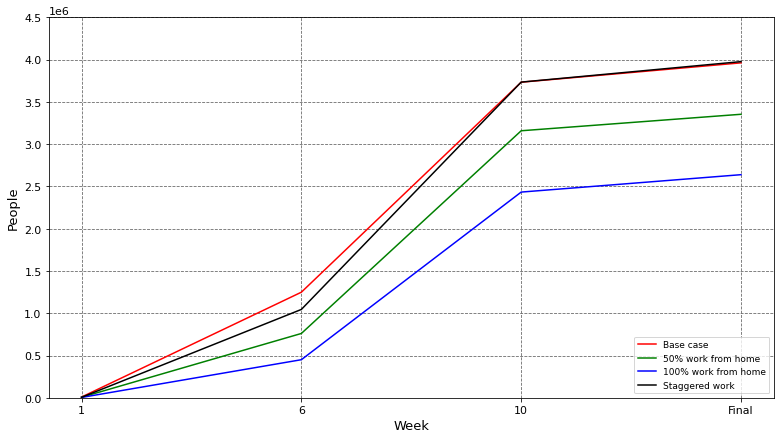

In [251]:
percent_work_100_infected = np.array([4222,450488,2432788,2638553])
percent_work_50_infected  = np.array([6402,760766,3157946,3352943])
base_case_infected        = np.array([8918,1248870,3732247,3961083])
staggered_work_infected   = np.array([5659,1045051,3733440,3975484])


#percent_work_25_infected = np.array([4538,585705,2827201,3022149])
#percent_work_75_infected = np.array([5012,862067,3414935,3642703])

def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4500000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='50% work from home')
    plt.plot(z, color='b',label='100% work from home')
    plt.plot(i, color='k',label='Staggered work')
    #plt.plot(k, color='r',label='Base case', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('intected_workpercent_interventions_level_infection_period_5_days.jpg')
    
sir_plot_r(base_case_infected,
          percent_work_50_infected,
          percent_work_100_infected,
          staggered_work_infected)

In [225]:
staggered_work     = res['baseline'][0][::12,1]

In [233]:
percent_work_100   = res['baseline'][0][::12,1]

In [237]:
percent_work_50    = res['baseline'][0][::12,1]

In [229]:
base_case          = res['baseline'][0][::12,1]

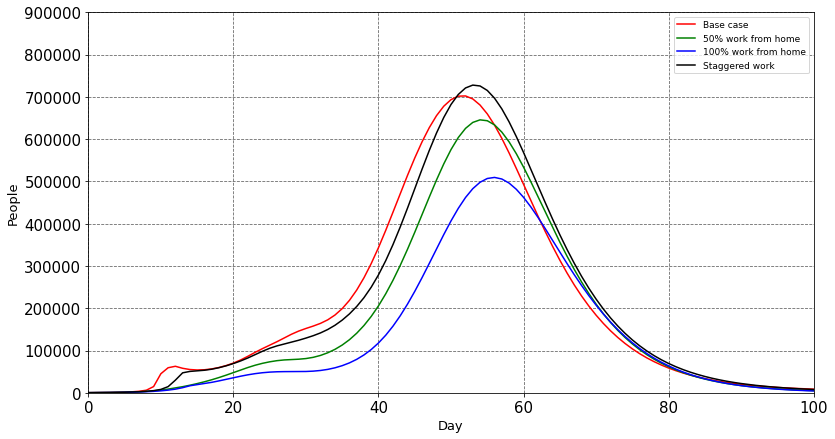

In [250]:
def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 900000,100000)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='50% work from home')
    plt.plot(z, color='b',label='100% work from home')
    plt.plot(i, color='k',label='Staggered work')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.legend(loc=1, prop={'size':9})
    
    plt.savefig('infected_workpercent_staggered_work_hour_infection_period_5_days.jpg')
    
sir_plot_r(base_case,
          percent_work_50,
          percent_work_100,
          staggered_work) 

In [ ]:
def sir_plot_r(x,y,z):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 3100000,1)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='50% Work from home')
    plt.plot(z, color='b',label='Work from home')
    #plt.plot(i, color='k',label='75% Work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=1, prop={'size':9})
    #plt.savefig('intected_workpercent.jpg')
    
sir_plot_r(episim_base_case_array,
          episim_50_work_from_home_array,
          episim_work_from_home_array) 

In [193]:
newI_base = res['baseline'][2]

newI_base.astype(int)

newI_base = np.sum(newI_base,axis=0)
newI_base = newI_base.astype(int)
newI_base =  np.where(newI< 0, 0, newI_base) 

In [196]:
newI_staggered = res['baseline'][2]

newI_staggered.astype(int)

newI_staggered = np.sum(newI_staggered,axis=0)
newI_staggered = newI_staggered.astype(int)
newI_staggered =  np.where(newI< 0, 0, newI_staggered) 

In [177]:
newI_staggered

array([  896,   924,   471, 22829,  3220,   170,  1086,   550,    55,
         672,  1281,     0,   872, 10460,  1903, 24626,  9008,  2395,
        2323,   215,  1856,   587,   732,     0,  8514,   234,  2640,
        1251,  1467,  1061,  5240,   827,   588,   181,  8102,  1082,
         738, 17514,   880,   914,   648, 13943,  1485,   883,  2298,
        9048,  1249,  8109,   855, 11177,   390,   713,  1377,  1727,
        1793,  1716,  1027,  4753,   613,  7892,   416,  2463, 13764,
        1146,   366,   807,    -4,  1575,   932,   369,   264,   650,
        1976,  2427, 10647,   321,  1778,  2104,   376,  2124,  3064,
       12946,   220, 23196,  3296,   506,  9564,  2625,  1586,     3,
         769,   382,   940,   952,  1166,  1264,   586,  1219,  3524,
        2464,  8566,   368,   738,  5142,   475,  2677,  2884, 12935,
        6996,   728,   772,  2926,   640,   979,   928,    -4,   674,
        1651,  5151,  1332,  4891,  2270,    -3,   173, 25180,   806,
         652,   527,

In [197]:
newI = newI_staggered - newI_base
#newI =  np.where(newI < 0, 0, newI) 
newI = newI.astype(int)
newI

array([    0,     0,  -114,     0,     0,     0,     0,   630,     0,
           0,   276,     0,     0,    61,     0,    49,     0,     0,
         388,     0,     0,     0,     0,     0,    66,     0,     0,
           0,     0,     0,     0,     0,   -70,   157,     0,     0,
           0,     0,     0,     0,     0,    48,   152,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,    33,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  8727,     0,     0,  5154,    16,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,    33,     0,
           0,     0,

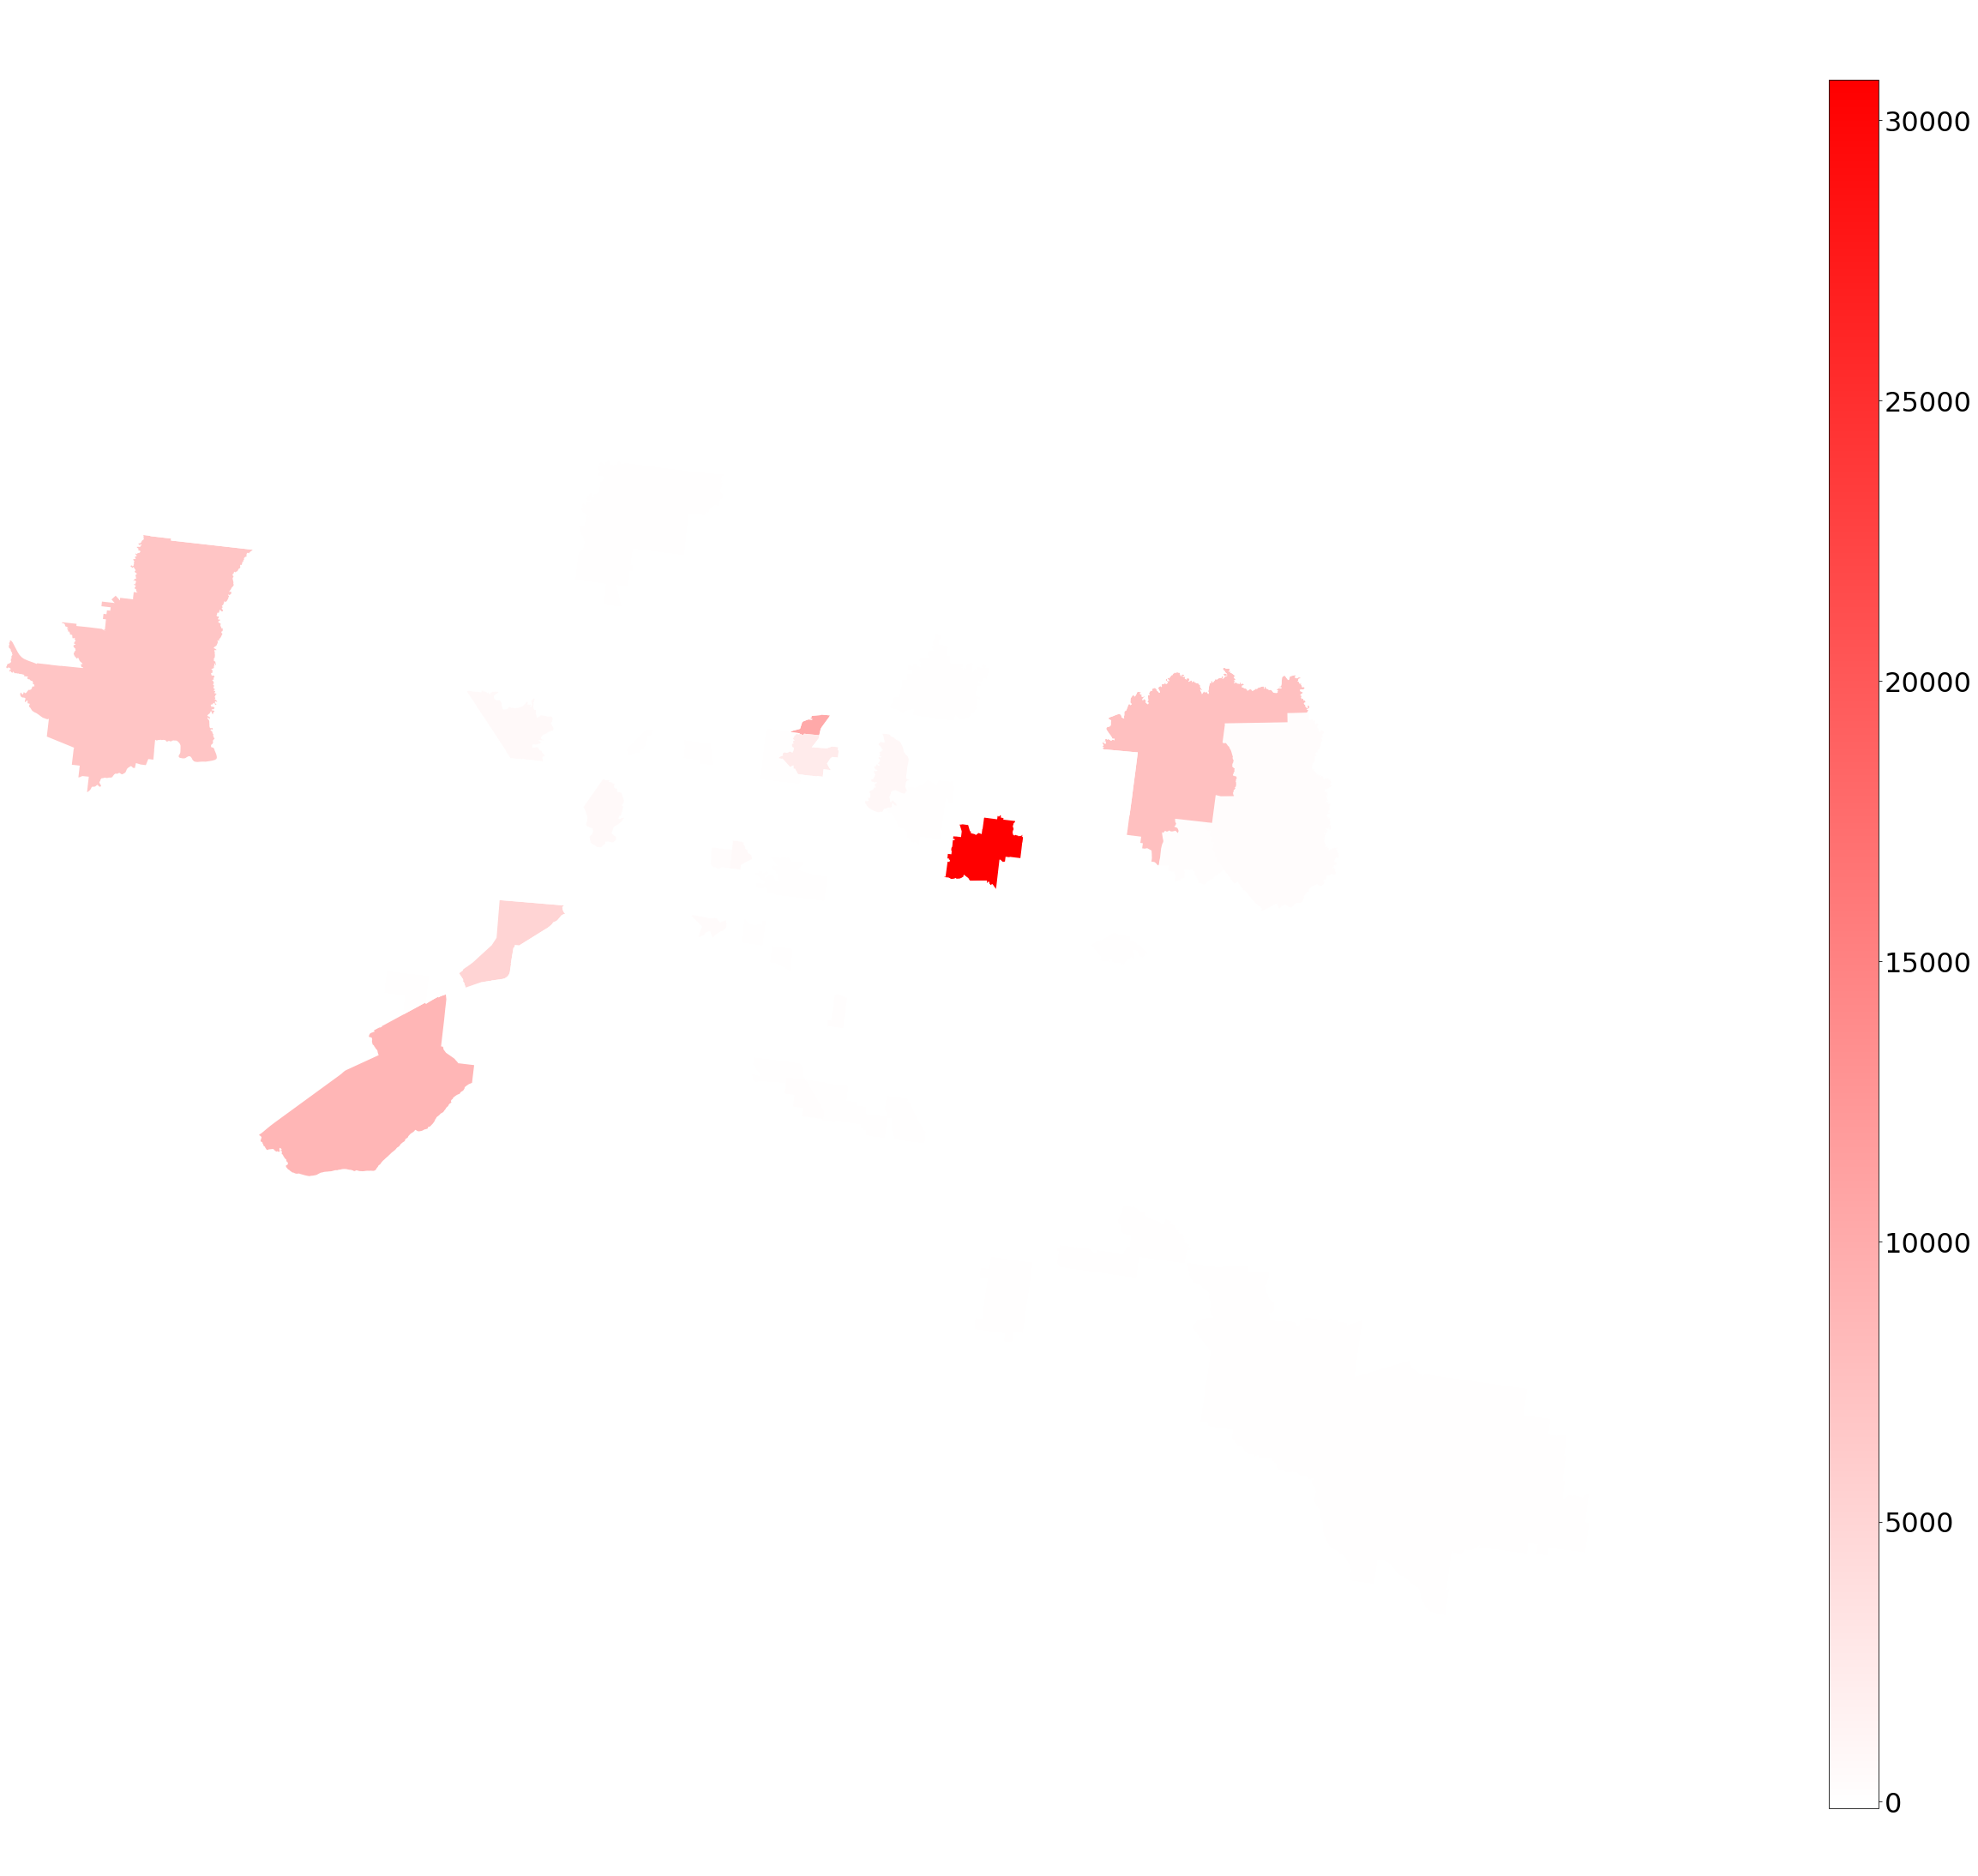

In [199]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI


plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))


cmap = LinearSegmentedColormap.from_list('mycmap', ['white','red'])

melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap)

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#ax.set_facecolor('red')
plt.savefig('base_staggered_wrok_{}.jpg'.format(iterations))
plt.show()

In [126]:
newI_50 = res['baseline'][2]

newI_50.astype(int)

newI_50 = np.sum(newI_50,axis=0)

In [122]:
newI_base = res['baseline'][2]

newI_base.astype(int)

newI_base = np.sum(newI_base,axis=0)

In [99]:
newI_from_home = res['baseline'][2]

newI_from_home.astype(int)

newI_from_home = np.sum(newI_from_home,axis=0)

In [127]:
newI = newI_from_home - newI_base
newI =  np.where(newI> 0, 0, newI) 
newI

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [128]:
newI = newI_50 - newI_base  

newI =  np.where(newI> 0, 0, newI) 
newI
plt.savefig('base_work_from_home_{}.jpg'.format(iterations))

array([ 0.00000000e+00, -3.24429818e-03,  0.00000000e+00, -2.82250532e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.67105094e-03,
       -1.74698940e-05, -1.40778810e-03,  0.00000000e+00,  0.00000000e+00,
       -3.05620417e-04, -4.26837098e+00, -2.09998827e-03, -3.04644436e+01,
       -2.29167170e-02, -8.49885409e-03, -7.12494875e-03, -6.90112910e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.97914637e+01,  0.00000000e+00, -2.85044743e-03, -9.72740305e-04,
        0.00000000e+00, -7.52938580e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.76569034e-05, -2.38091757e-02,  0.00000000e+00,
       -4.73510962e-05, -7.59116519e+01,  0.00000000e+00, -1.70641152e-03,
        0.00000000e+00, -5.94506505e+00,  0.00000000e+00, -1.15279623e-03,
       -8.50873497e-03, -5.65958839e-02, -1.24280762e-03, -8.07756332e-03,
        0.00000000e+00, -4.12940714e-02,  0.00000000e+00,  0.00000000e+00,
       -1.90706516e-04, -

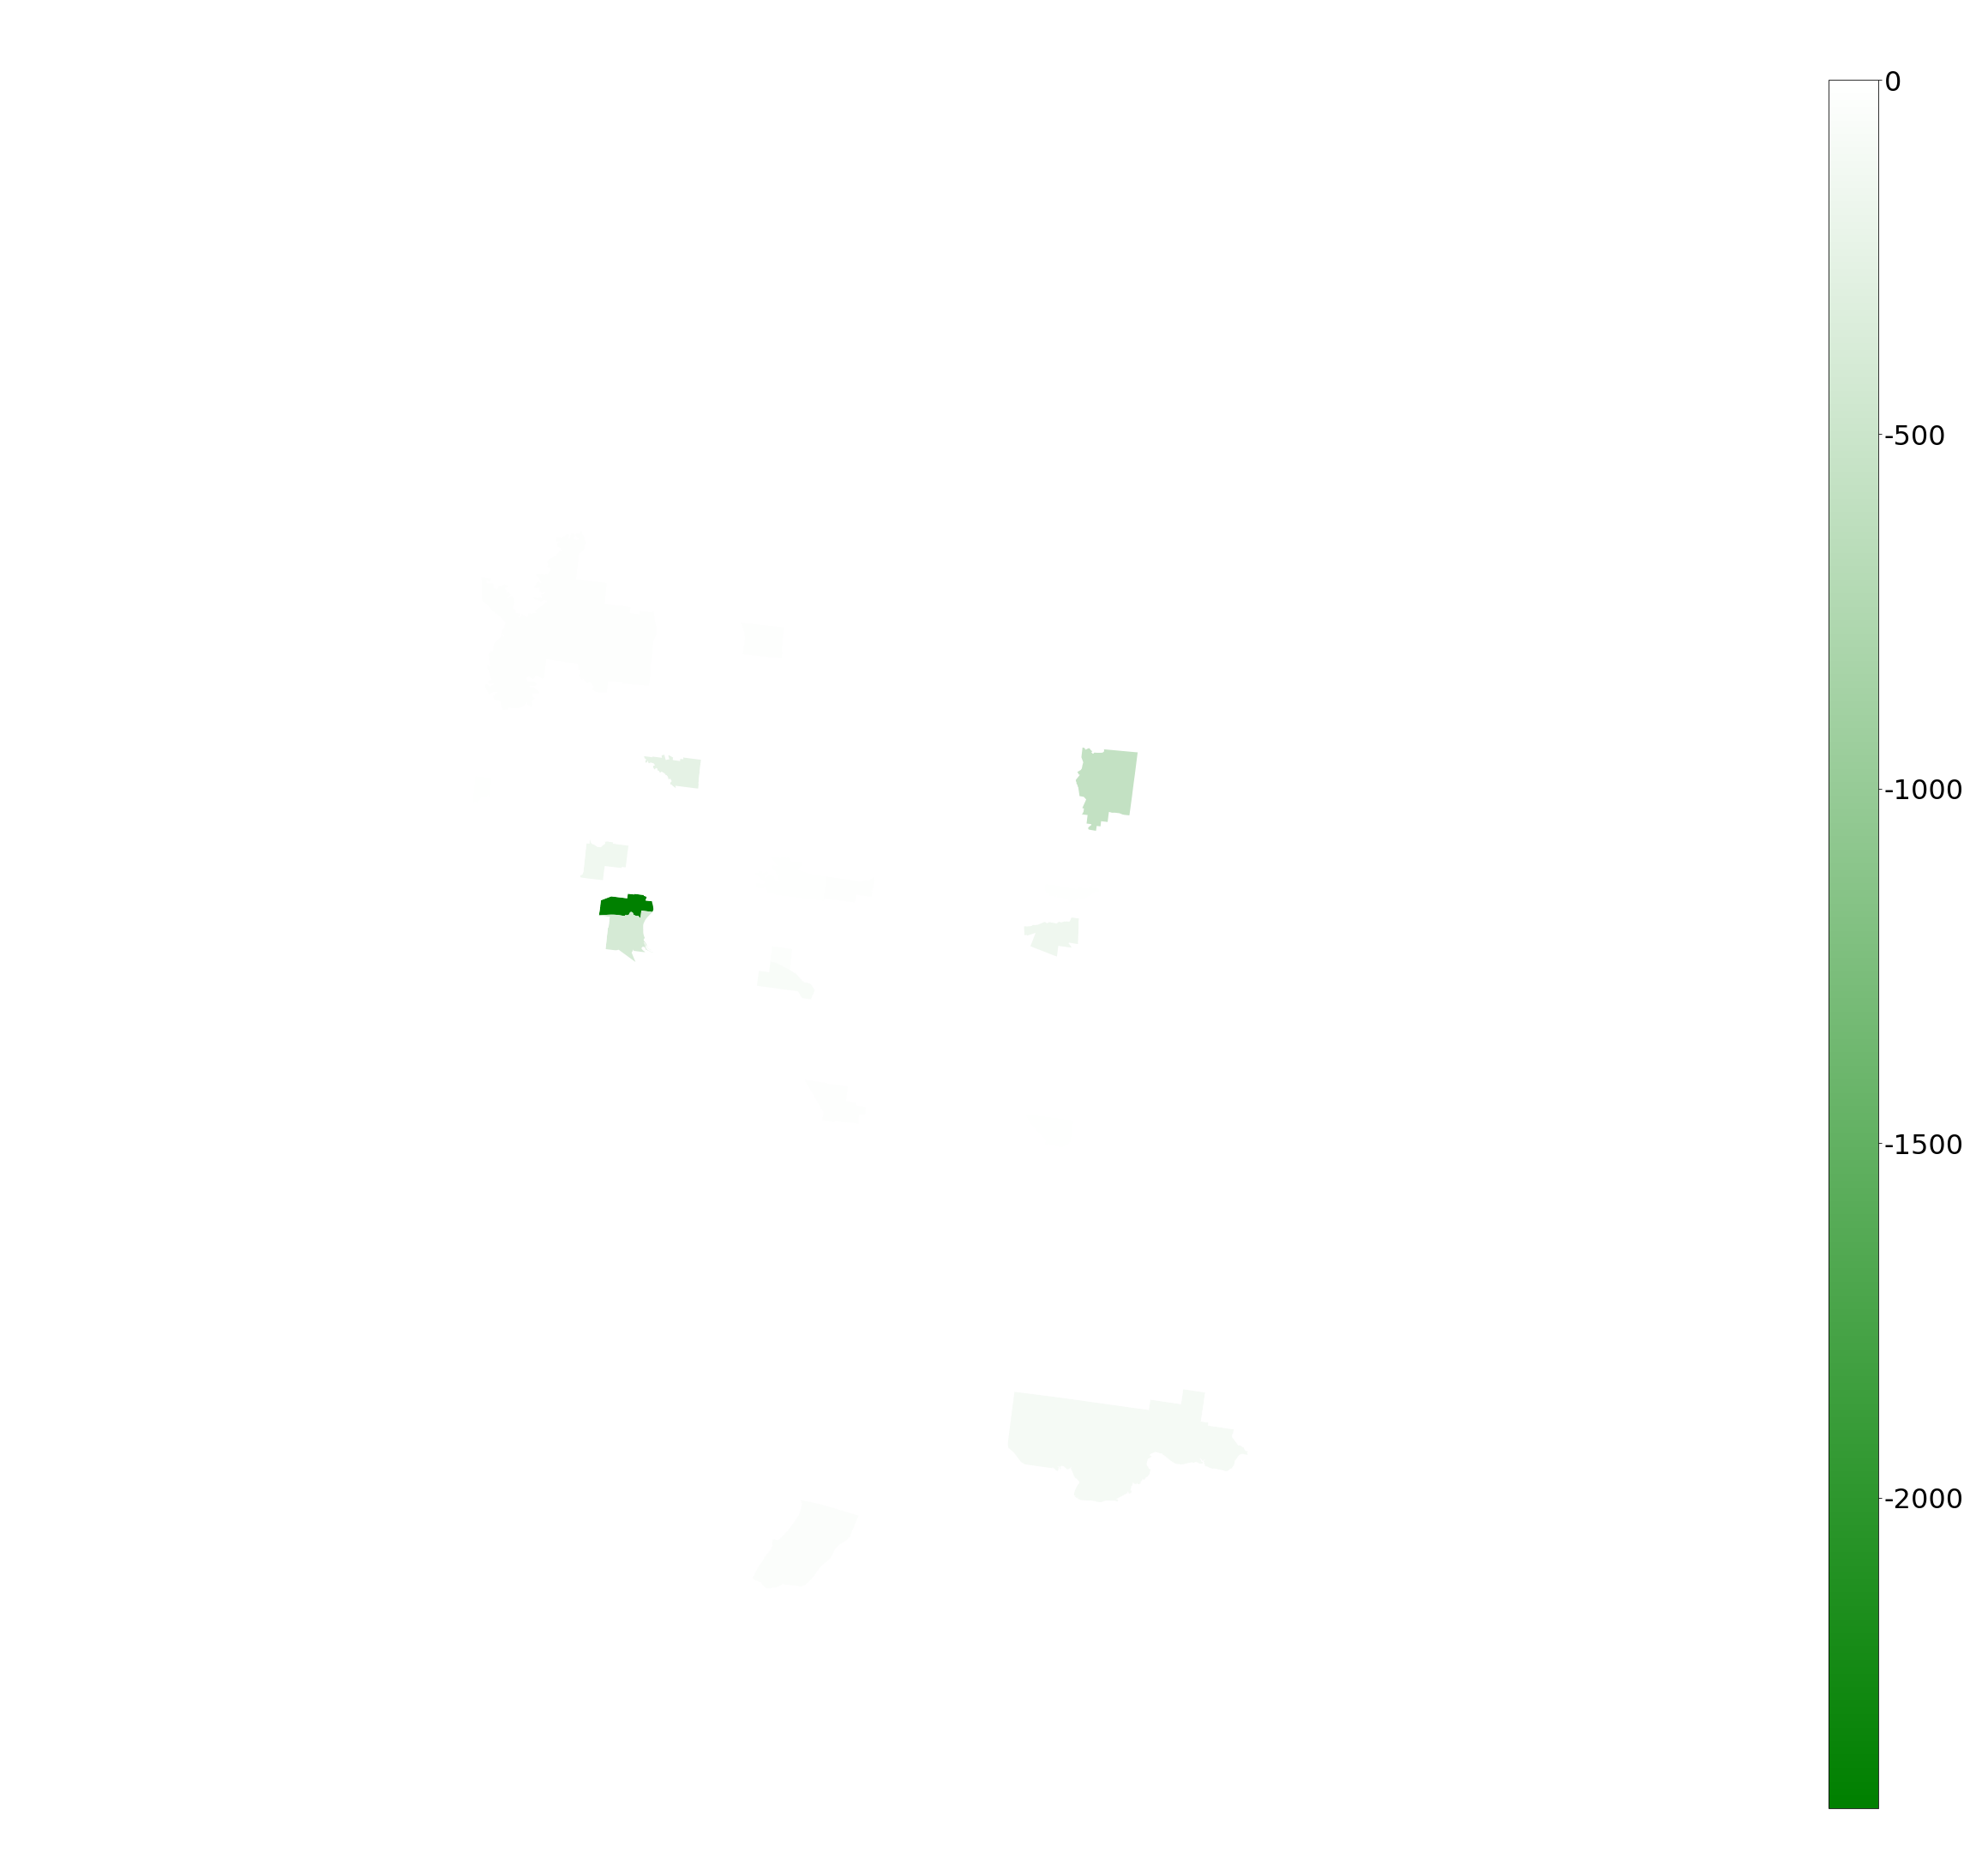

In [129]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap


melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI


plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white'])
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap)

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('base_work_from_home_50_{}.jpg'.format(iterations))
plt.show()

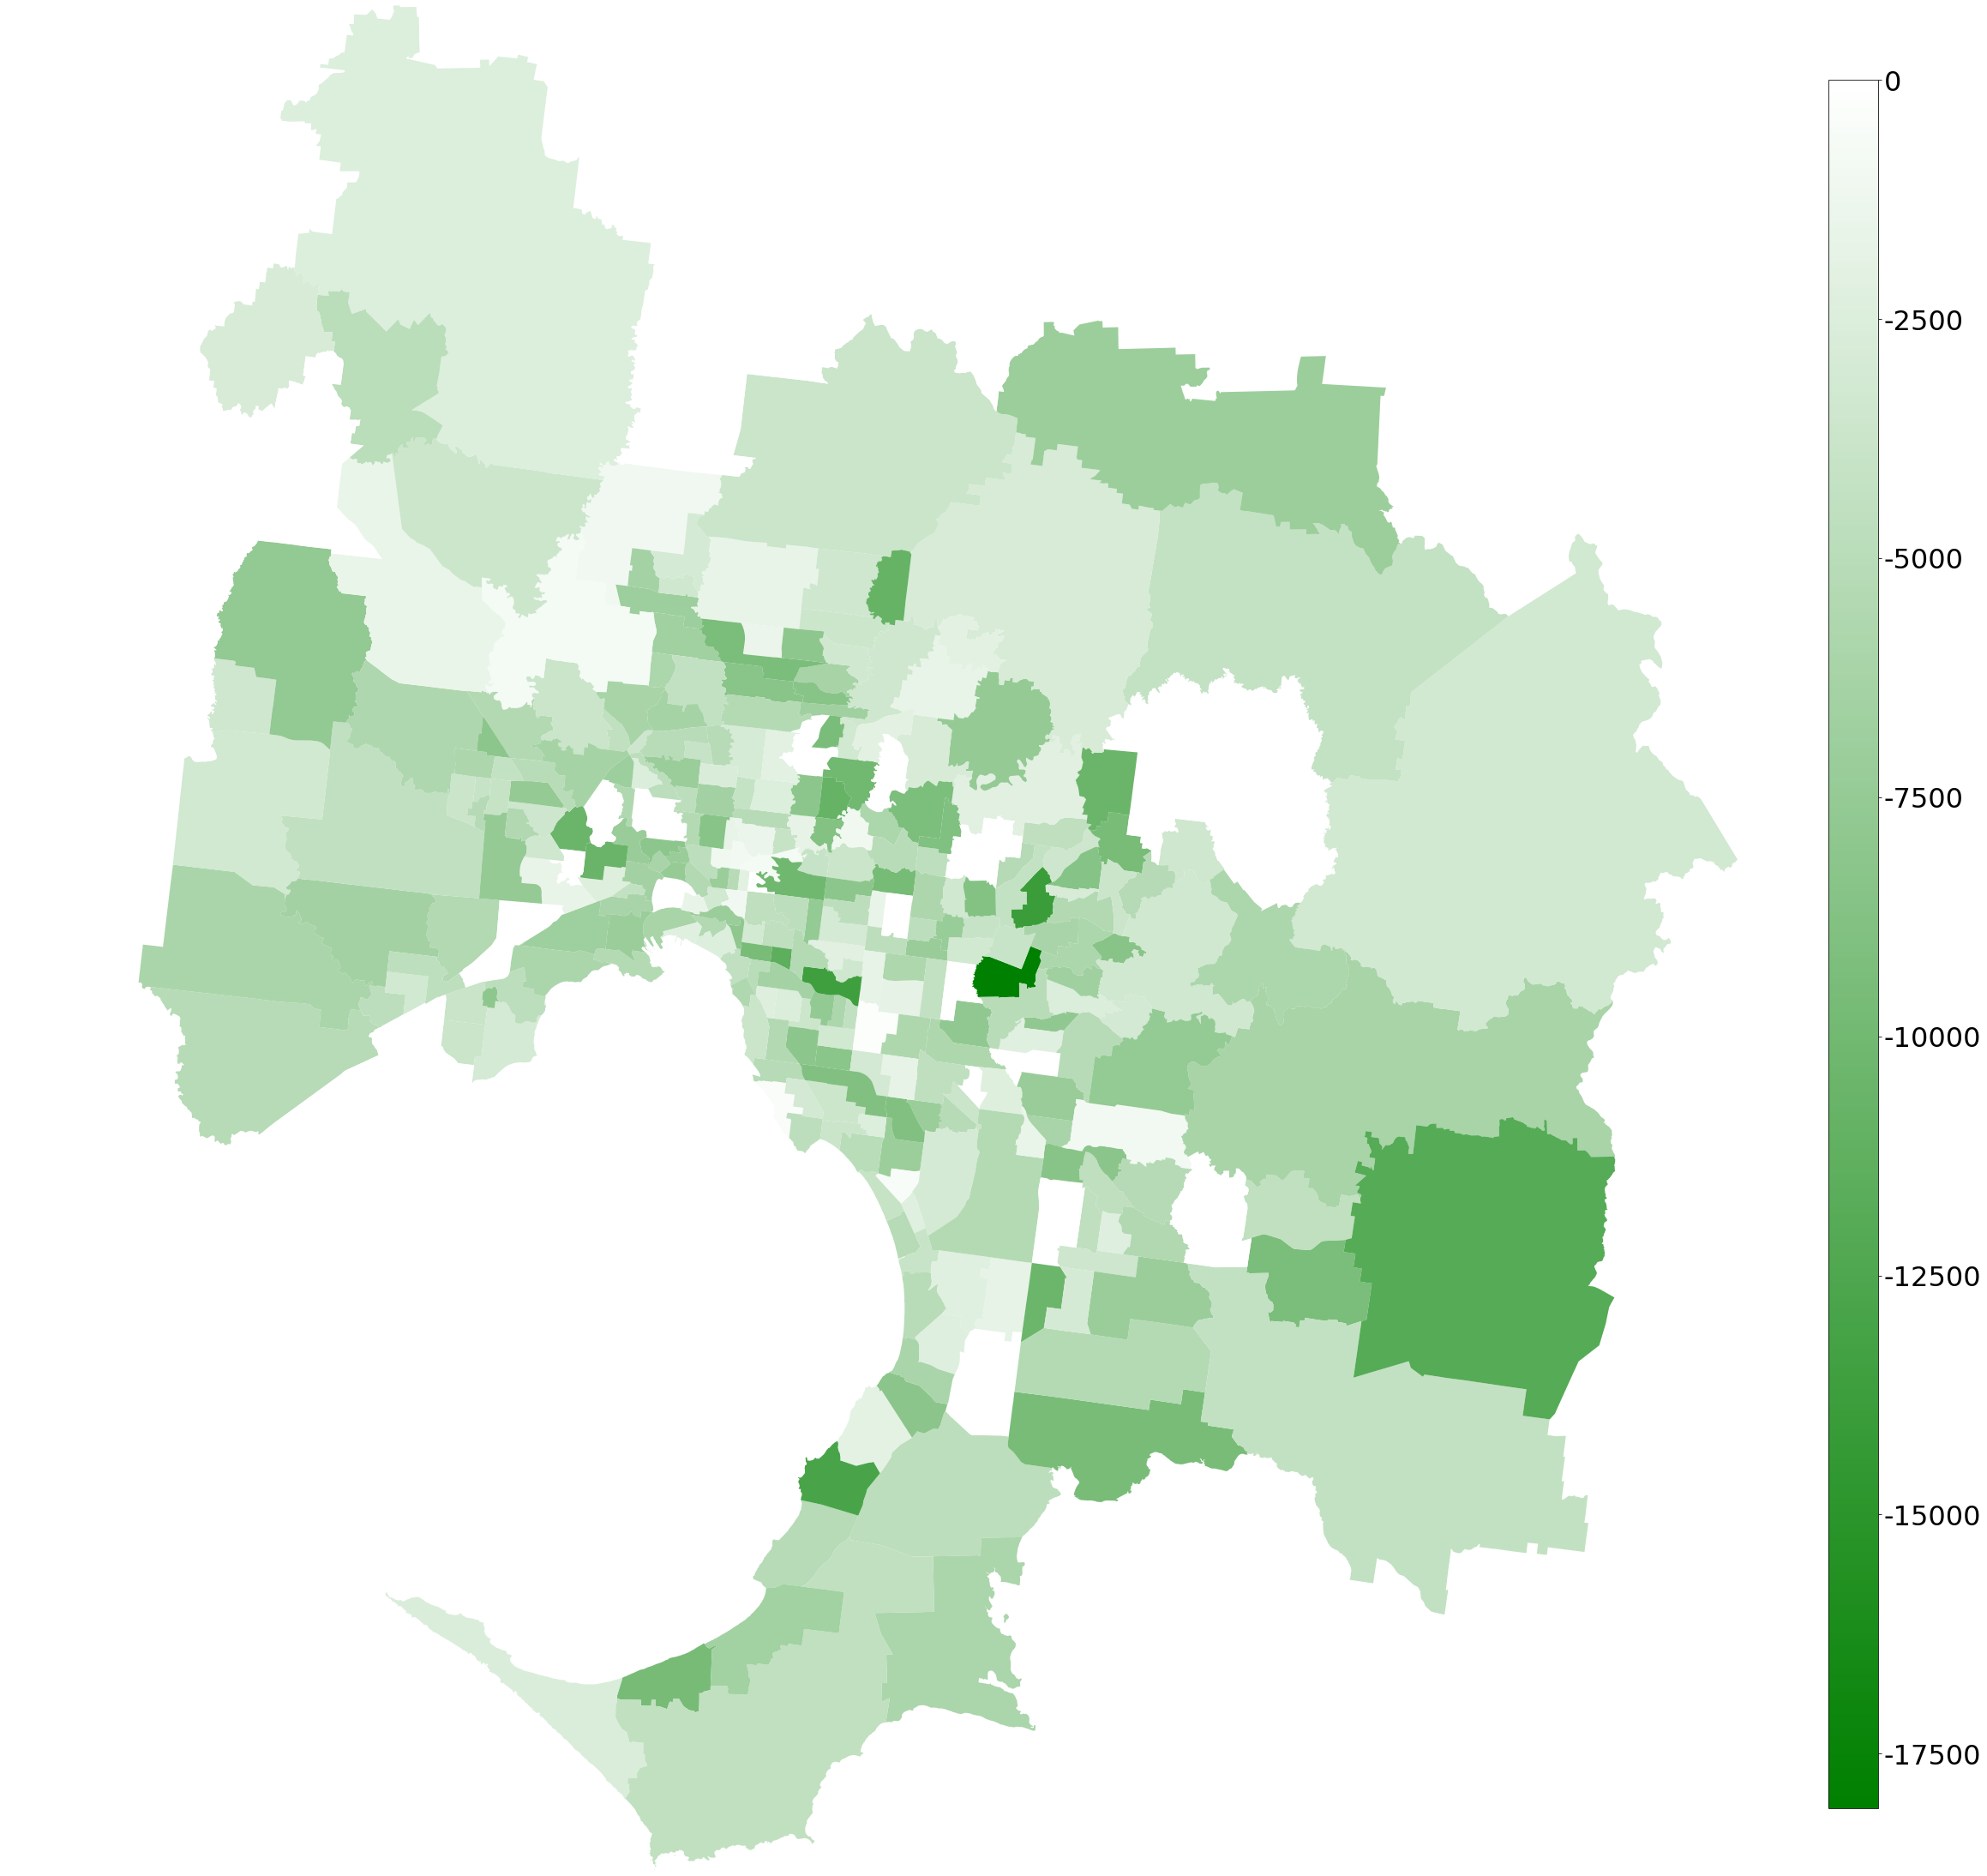

In [105]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI


plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))


cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white'])

melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap)

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#ax.set_facecolor('red')
plt.savefig('base_work_from_home_{}.jpg'.format(iterations))
plt.show()

In [ ]:
import geopandas as gpd
import contextily as ctx

#melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds

hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Oranges')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Oranges',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#plt.savefig("melbourne_infect_work_from_home_dis.jpg")
plt.show()

In [185]:
k = res['baseline'][0][::12,1]

In [197]:
i = res['baseline'][0][::12,1]

In [177]:
z = res['baseline'][0][::12,1]

In [181]:
y = res['baseline'][0][::12,1]

In [189]:
x = res['baseline'][0][::12,1]

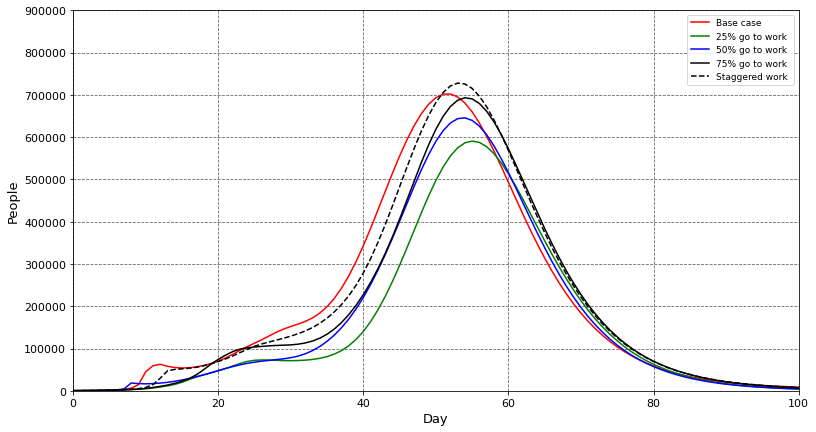

In [200]:
def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 900000,100000)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='50% work from home')
    plt.plot(z, color='b',label='100% work from home')
    plt.plot(i, color='k',label='Staggered work')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.legend(loc=1, prop={'size':9})
    
    #plt.savefig('infected_workpercent_staggered_work_hour.jpg')
    
sir_plot_r(x,y,z,i,k) 

In [53]:
k = res['baseline'][0][::12,3]

In [37]:
i = res['baseline'][0][::12,3]

In [41]:
z = res['baseline'][0][::12,3]

In [45]:
y = res['baseline'][0][::12,3]

In [49]:
x = res['baseline'][0][::12,3]

In [25]:
k = res['baseline'][0][::12,1]

In [30]:
i = res['baseline'][0][::12,1]

In [12]:
z = res['baseline'][0][::12,1]

In [16]:
y = res['baseline'][0][::12,1]

In [20]:
x = res['baseline'][0][::12,1]

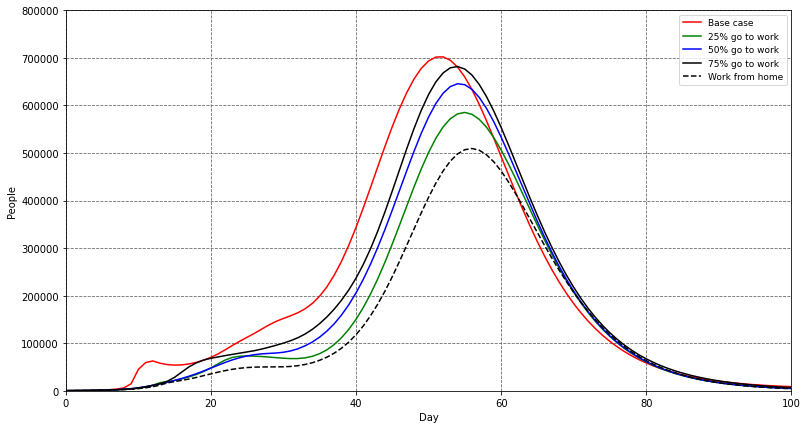

In [33]:
def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='25% go to work')
    plt.plot(z, color='b',label='50% go to work')
    plt.plot(i, color='k',label='75% go to work')
    plt.plot(k, color='k',label='Work from home', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('intected_workpercent_base_case.jpg')
    
sir_plot_r(x,y,z,i,k) 

(110, 309)
18647.396998906297


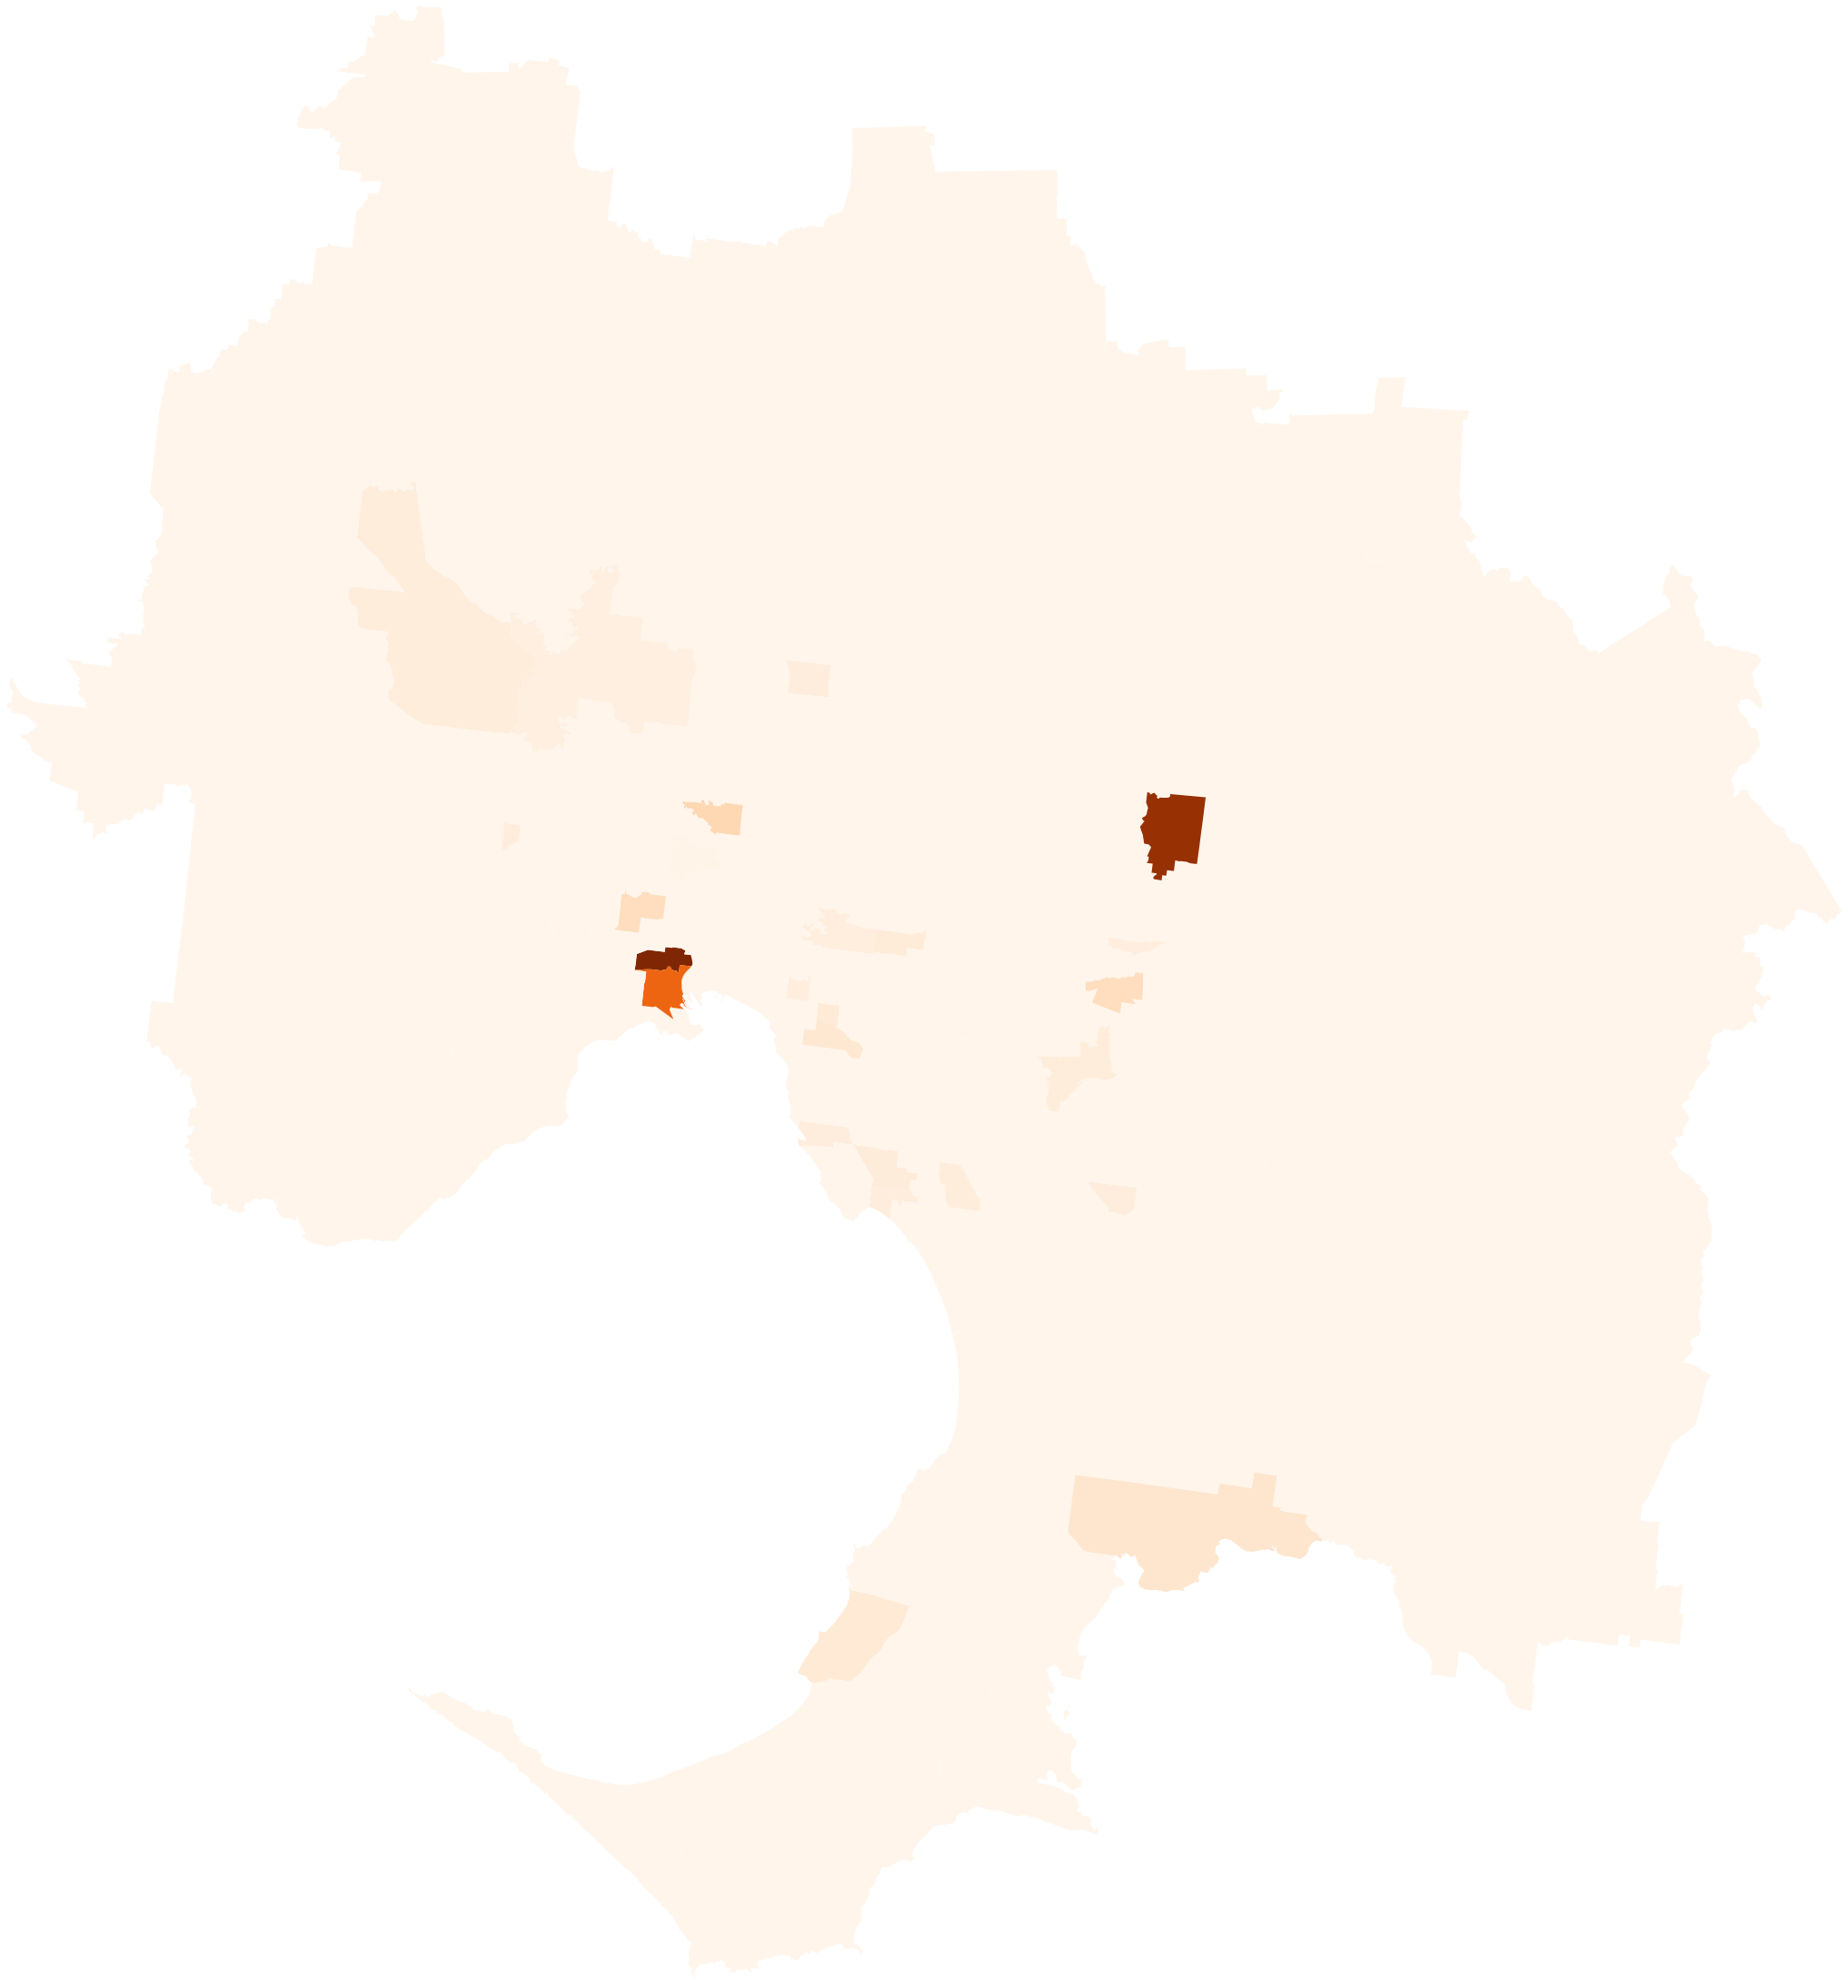

In [87]:
import geopandas as gpd
import contextily as ctx

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds

hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Oranges')

#cbax = fig.add_axes([0.9,0.15,0.02,0.7])

#sm = plt.cm.ScalarMappable(cmap='Oranges',\
                         # norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

#sm._A=[]

#Draw colormap into cbax

#fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#plt.savefig('melbourne_infect_basecase_no_cb_{}.jpg'.format(iterations))
plt.show()

In [24]:
k = res['baseline'][0][::12,3]

In [37]:
z = res['baseline'][0][::12,3]

In [33]:
y = res['baseline'][0][::12,3]

In [41]:
x = res['baseline'][0][::12,3]

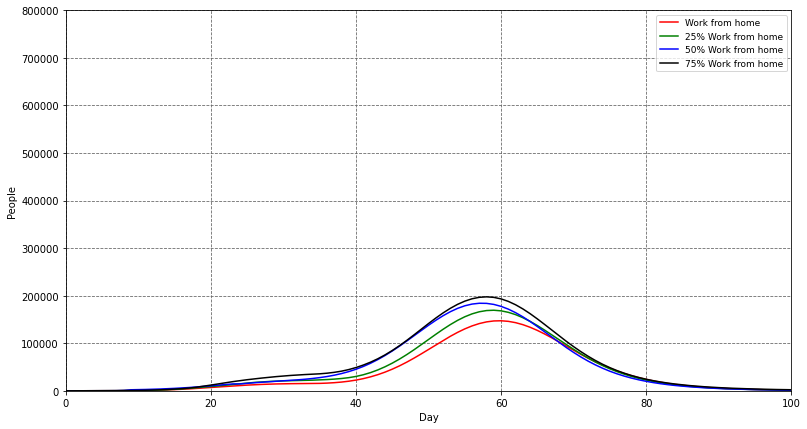

In [45]:
def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='Work from home')
    plt.plot(y, color='g',label='25% Work from home')
    plt.plot(z, color='b',label='50% Work from home')
    plt.plot(i, color='k',label='75% Work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('hospitaled_workpercent.jpg')
    
sir_plot_r(x,y,z,k) 

In [21]:
k = res['baseline'][0][::12,1]

In [17]:
y = res['baseline'][0][::12,1]

In [13]:
y = res['baseline'][0][::12,1]

In [5]:
x = res['baseline'][0][::12,1]

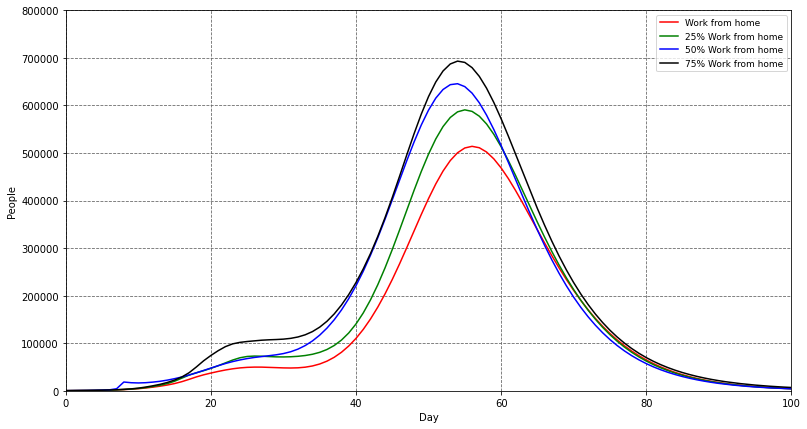

In [23]:
def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='Work from home')
    plt.plot(y, color='g',label='25% Work from home')
    plt.plot(z, color='b',label='50% Work from home')
    plt.plot(i, color='k',label='75% Work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('intected_workpercent.jpg')
    
sir_plot_r(x,y,z,k) 

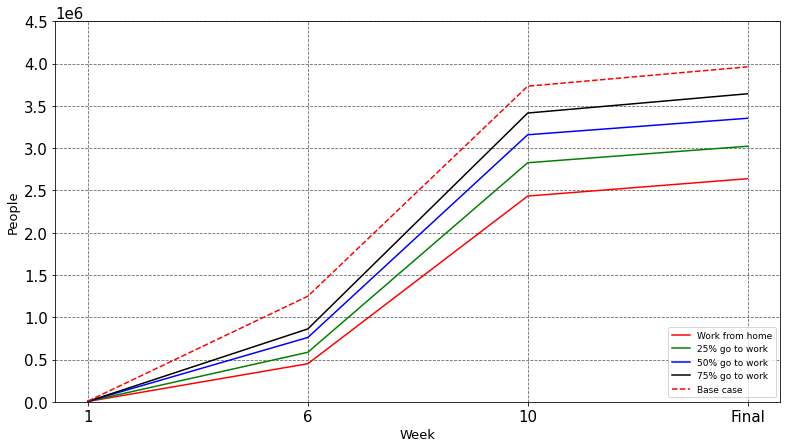

In [168]:
x = np.array([4222,450488,2432788,2638553])
y = np.array([4538,585705,2827201,3022149])
z = np.array([6402,760766,3157946,3352943])
i = np.array([5012,862067,3414935,3642703])
k = np.array([8918,1248870,3732247,3961083])

def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4500000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Work from home')
    plt.plot(y, color='g',label='25% go to work')
    plt.plot(z, color='b',label='50% go to work')
    plt.plot(i, color='k',label='75% go to work')
    plt.plot(k, color='r',label='Base case', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('intected_workpercent_interventions_level.jpg')
    
sir_plot_r(x,y,z,i,k)

In [60]:
import pandas as pd

episim_data = pd.read_excel(open('/Users/cptnemo2005/Desktop/SEIR/Book1.xlsx', 'rb'),sheet_name='Sheet1')

episim_base_case         = episim_data['Base case']
episim_50_work_from_home = episim_data['50% Work from home']
episim_work_from_home    = episim_data['Work from home']

In [61]:
episim_base_case_array         = episim_base_case.to_numpy()
episim_50_work_from_home_array = episim_50_work_from_home.to_numpy()
episim_work_from_home_array    = episim_work_from_home.to_numpy()

type(episim_base_case_array)

numpy.ndarray

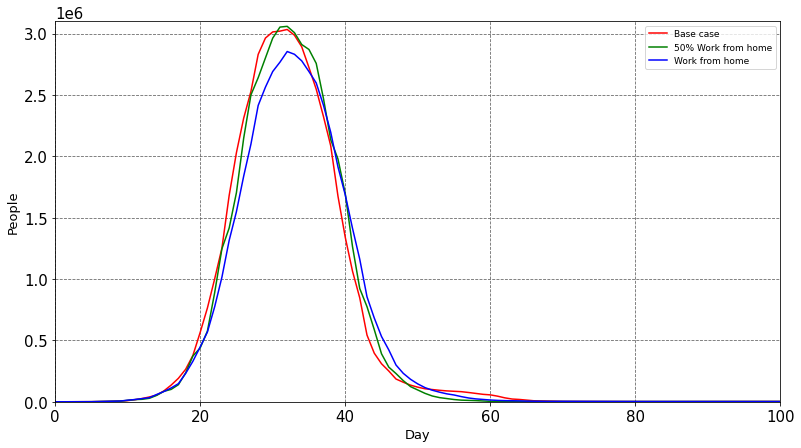

In [221]:
def sir_plot_r(x,y,z):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 3100000,1)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='50% Work from home')
    plt.plot(z, color='b',label='Work from home')
    #plt.plot(i, color='k',label='75% Work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=1, prop={'size':9})
    #plt.savefig('intected_workpercent.jpg')
    
sir_plot_r(episim_base_case_array,
          episim_50_work_from_home_array,
          episim_work_from_home_array) 

In [211]:
episim_base_case_array

array([    100,     200,     300,     400,     500,    1100,    1700,
          2800,    4400,    6400,    9500,   17000,   26700,   39300,
         54500,   88800,  135900,  191300,  264800,  377900,  564900,
        764000, 1001300, 1252300, 1681300, 2029500, 2310400, 2528400,
       2830500, 2963400, 3013300, 3019800, 3033300, 2986300, 2892500,
       2722900, 2546800, 2323600, 2085400, 1674800, 1341000, 1064600,
        846800,  543600,  396300,  310000,  251100,  185500,  159300,
        135700,  119200,  106100,   99700,   93700,   88800,   85800,
         82500,   75800,   68100,   60800,   56500,   45900,   32200,
         22600,   19100,   13400,    8500,    7500,    6600,    4700,
          3200,    3200,    2800,    2600,    2400,    2400,    2400,
          2300,    2100,    2000,    2000,    1900,    1900,    1900,
          1800,    1800,    1800,    1700,    1700,    1700,    1700,
          1700,    1800,    2100,    2100,    2100,    2200,    2500,
          2700,    2

Max number of hospitalised people:  147266 
 Day with max hospitalised people:  59


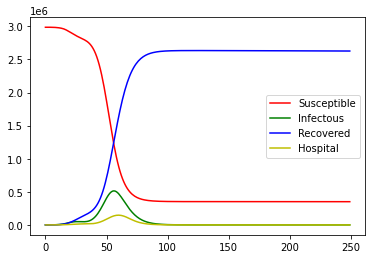

In [3]:
print(
"Max number of hospitalised people: ", int(res["baseline"][0][:,3].max()),
"\n",
"Day with max hospitalised people: ", int(res["baseline"][0][:,3].argmax()/12)
)
# plot result
sir_plot(res["baseline"][0])

(3000, 309)
2636914.5892456016


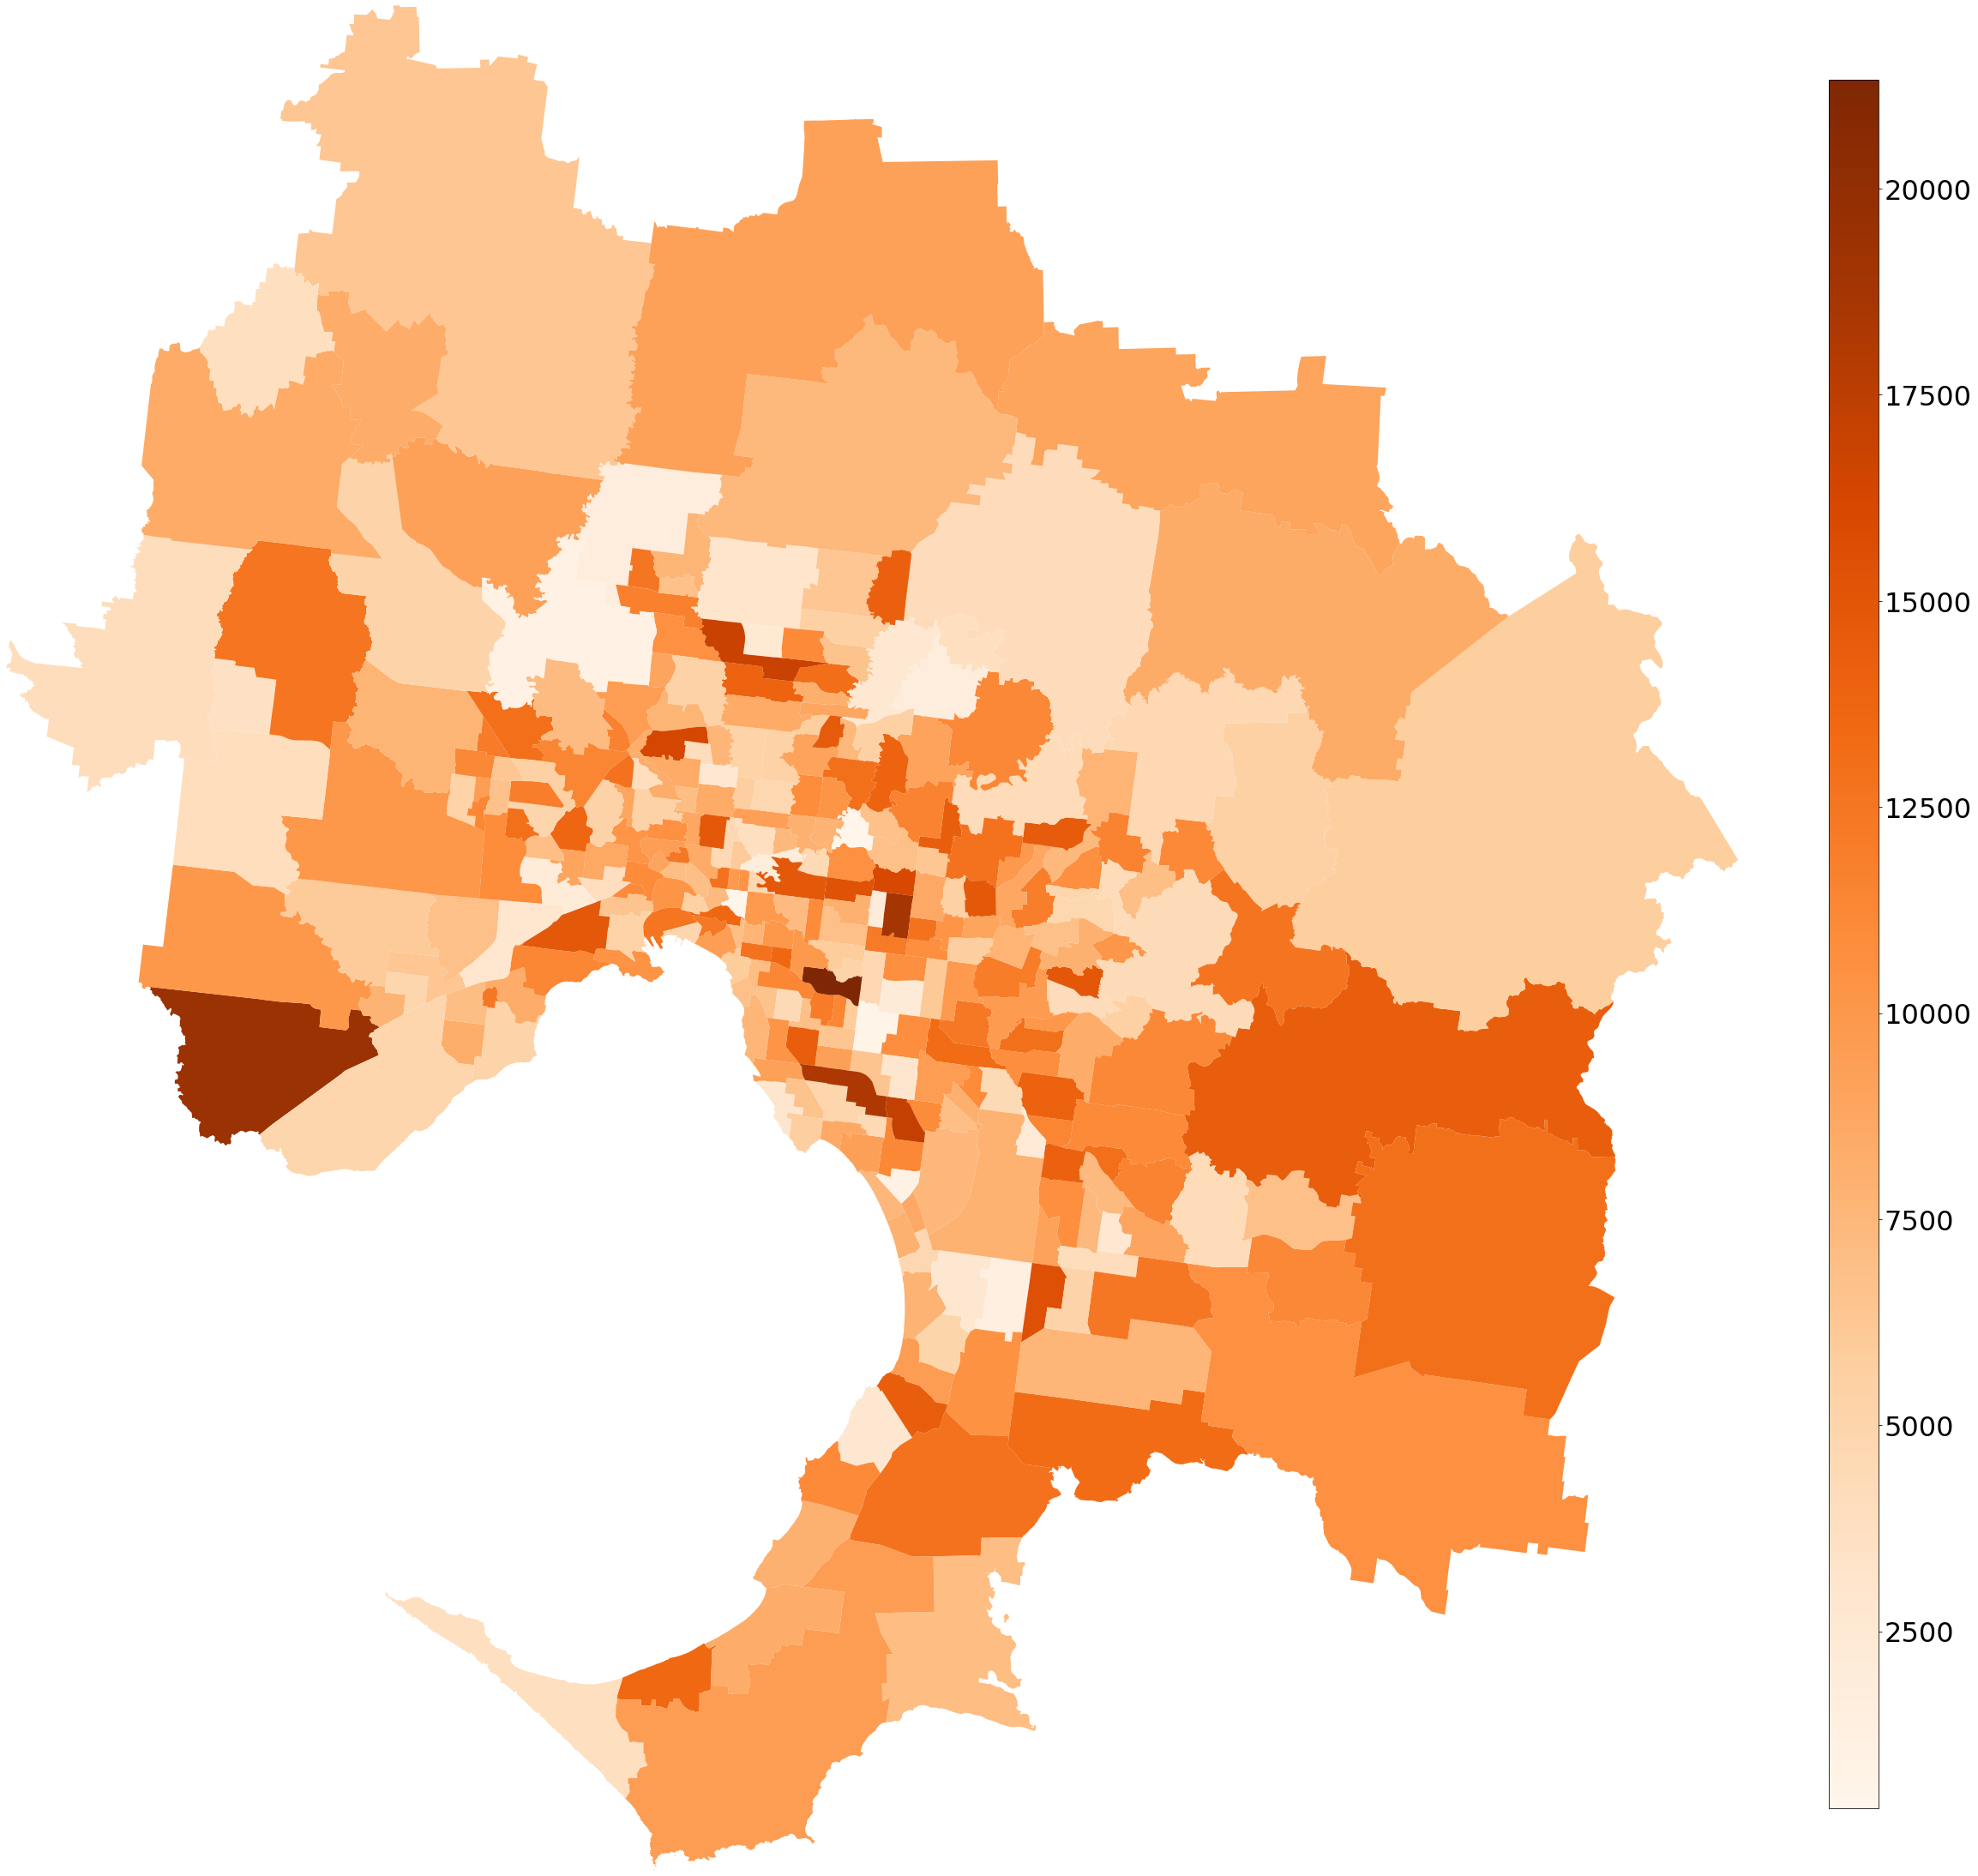

In [13]:
import geopandas as gpd
import contextily as ctx

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds

hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Oranges')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Oranges',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig("melbourne_infect_work_from_home_dis.jpg")
plt.show()